# Name: Ahmed Mohiuddin Shah
# CMS ID: 415216
# Section: BSCS-12-A
# Assignment: 2
# Subject: Machine Learning
# Submitted to: Dr. Muhammad Moazam Fraz

# CS471 Assignment 2 - Support Vector Machines

## Tasks: Classification and Regression using SVM

## Environment Setup

### Installing Libraries

In [2]:
# %pip install numpy pandas matplotlib seaborn scikit-learn

### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    explained_variance_score,
    mean_absolute_percentage_error,
    mean_squared_log_error,
)
from scipy import stats
import joblib

# Set plot style
sns.set_theme(style="whitegrid")

### Loading saved best models

- only need to use if getting into memory bottlenecks like i was getting into

In [80]:
# Load the best models and modified datasets
# best_linear_svm = joblib.load("best_rock_linear_svm_model.pkl")
# best_rbf_svm = joblib.load("best_rock_rbf_svm_model.pkl")
# best_poly_svm = joblib.load("best_rock_poly_svm_model.pkl")
# modified_rock_classification_dataset_train = pd.read_csv(
#     "modified_rock_classification_dataset_train.csv"
# )

# best_linear_regression_svm = joblib.load(
#     "best_theme_park_linear_regression_svm_model.pkl"
# )

# best_rbf_regression_svm = joblib.load("best_Theme_park_rbf_regression_svm_model.pkl")

# modified_theme_park_visitor_count_dataset_train = pd.read_csv(
#     "modified_theme_park_visitor_count_dataset_train.csv"
# )

## 1. Classification Task (Rock Dataset)

### 1.1 Load and Explore the Dataset

- Seeing the shape of this data we can see we have 13611 rows of data with 17 columns

In [109]:
rock_data = pd.read_csv("rock_classification_dataset.csv")

# Data Exploration
print("Dataset Shape:", rock_data.shape)
print("Dataset Preview:")
rock_data.head()

Dataset Shape: (13611, 17)
Dataset Preview:


Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724      1  
1     0.953861      0.006979      0.003564      0.909851      0.998430      1  
2     0.908774      0.007244      0.003048      0.825871      0.999066      1  
3     0.928329      0.007017      0.003215      0.861794      0.994199      1  
4     0.970516      0.006697      0.003665      0.941900      0.999166      1

- The data has no missing values we can see so we don't neet to fill or drop missing values

In [110]:
# Check for missing values
print("\nMissing Values:")
rock_data.isnull().sum()


Missing Values:


Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

#### 1.1.1 Correlation Matrix


Correlation Matrix:


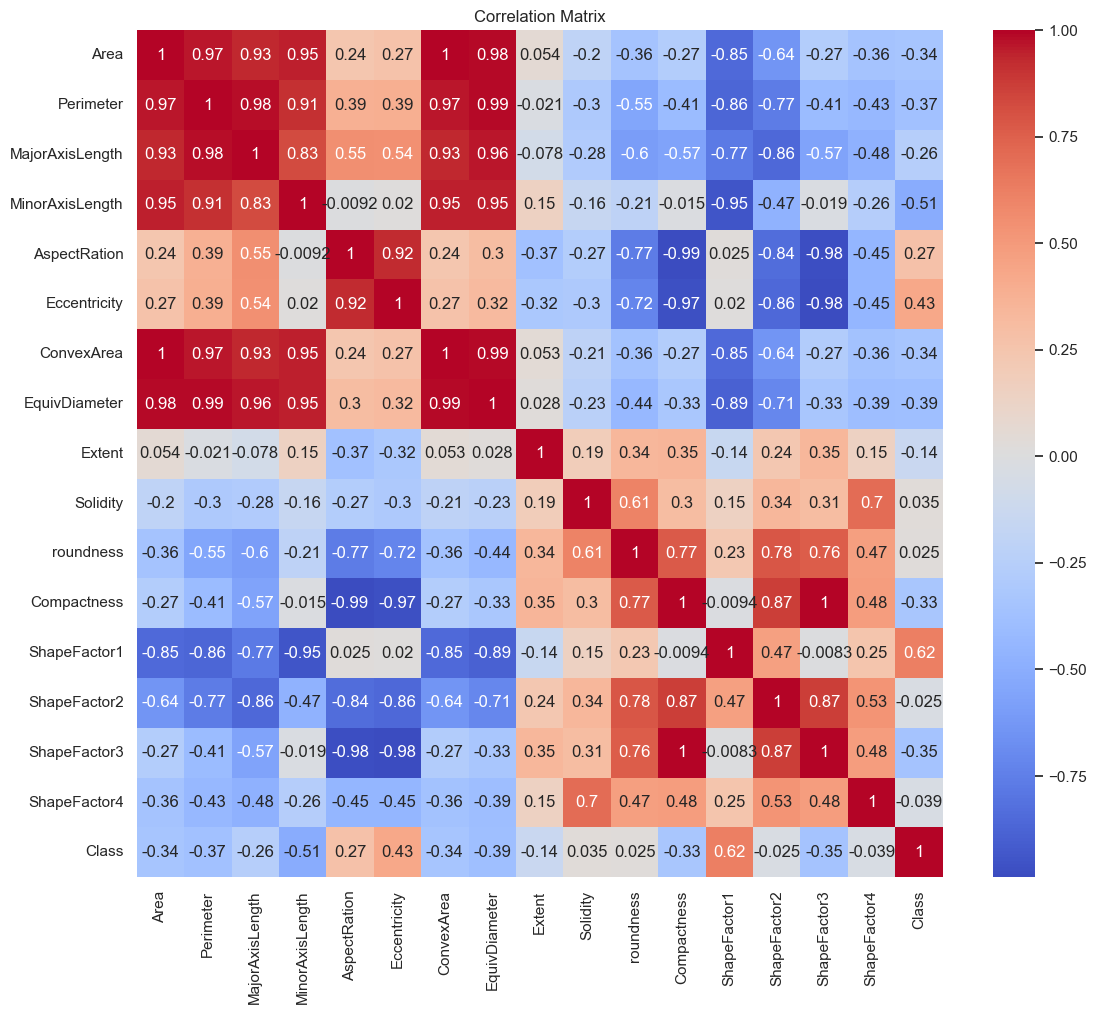

In [111]:
# correlation matrix
corr = rock_data.corr()

print("\nCorrelation Matrix:")
plt.figure(figsize=(13, 11))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

#### 1.1.2 Histogram plot of classes

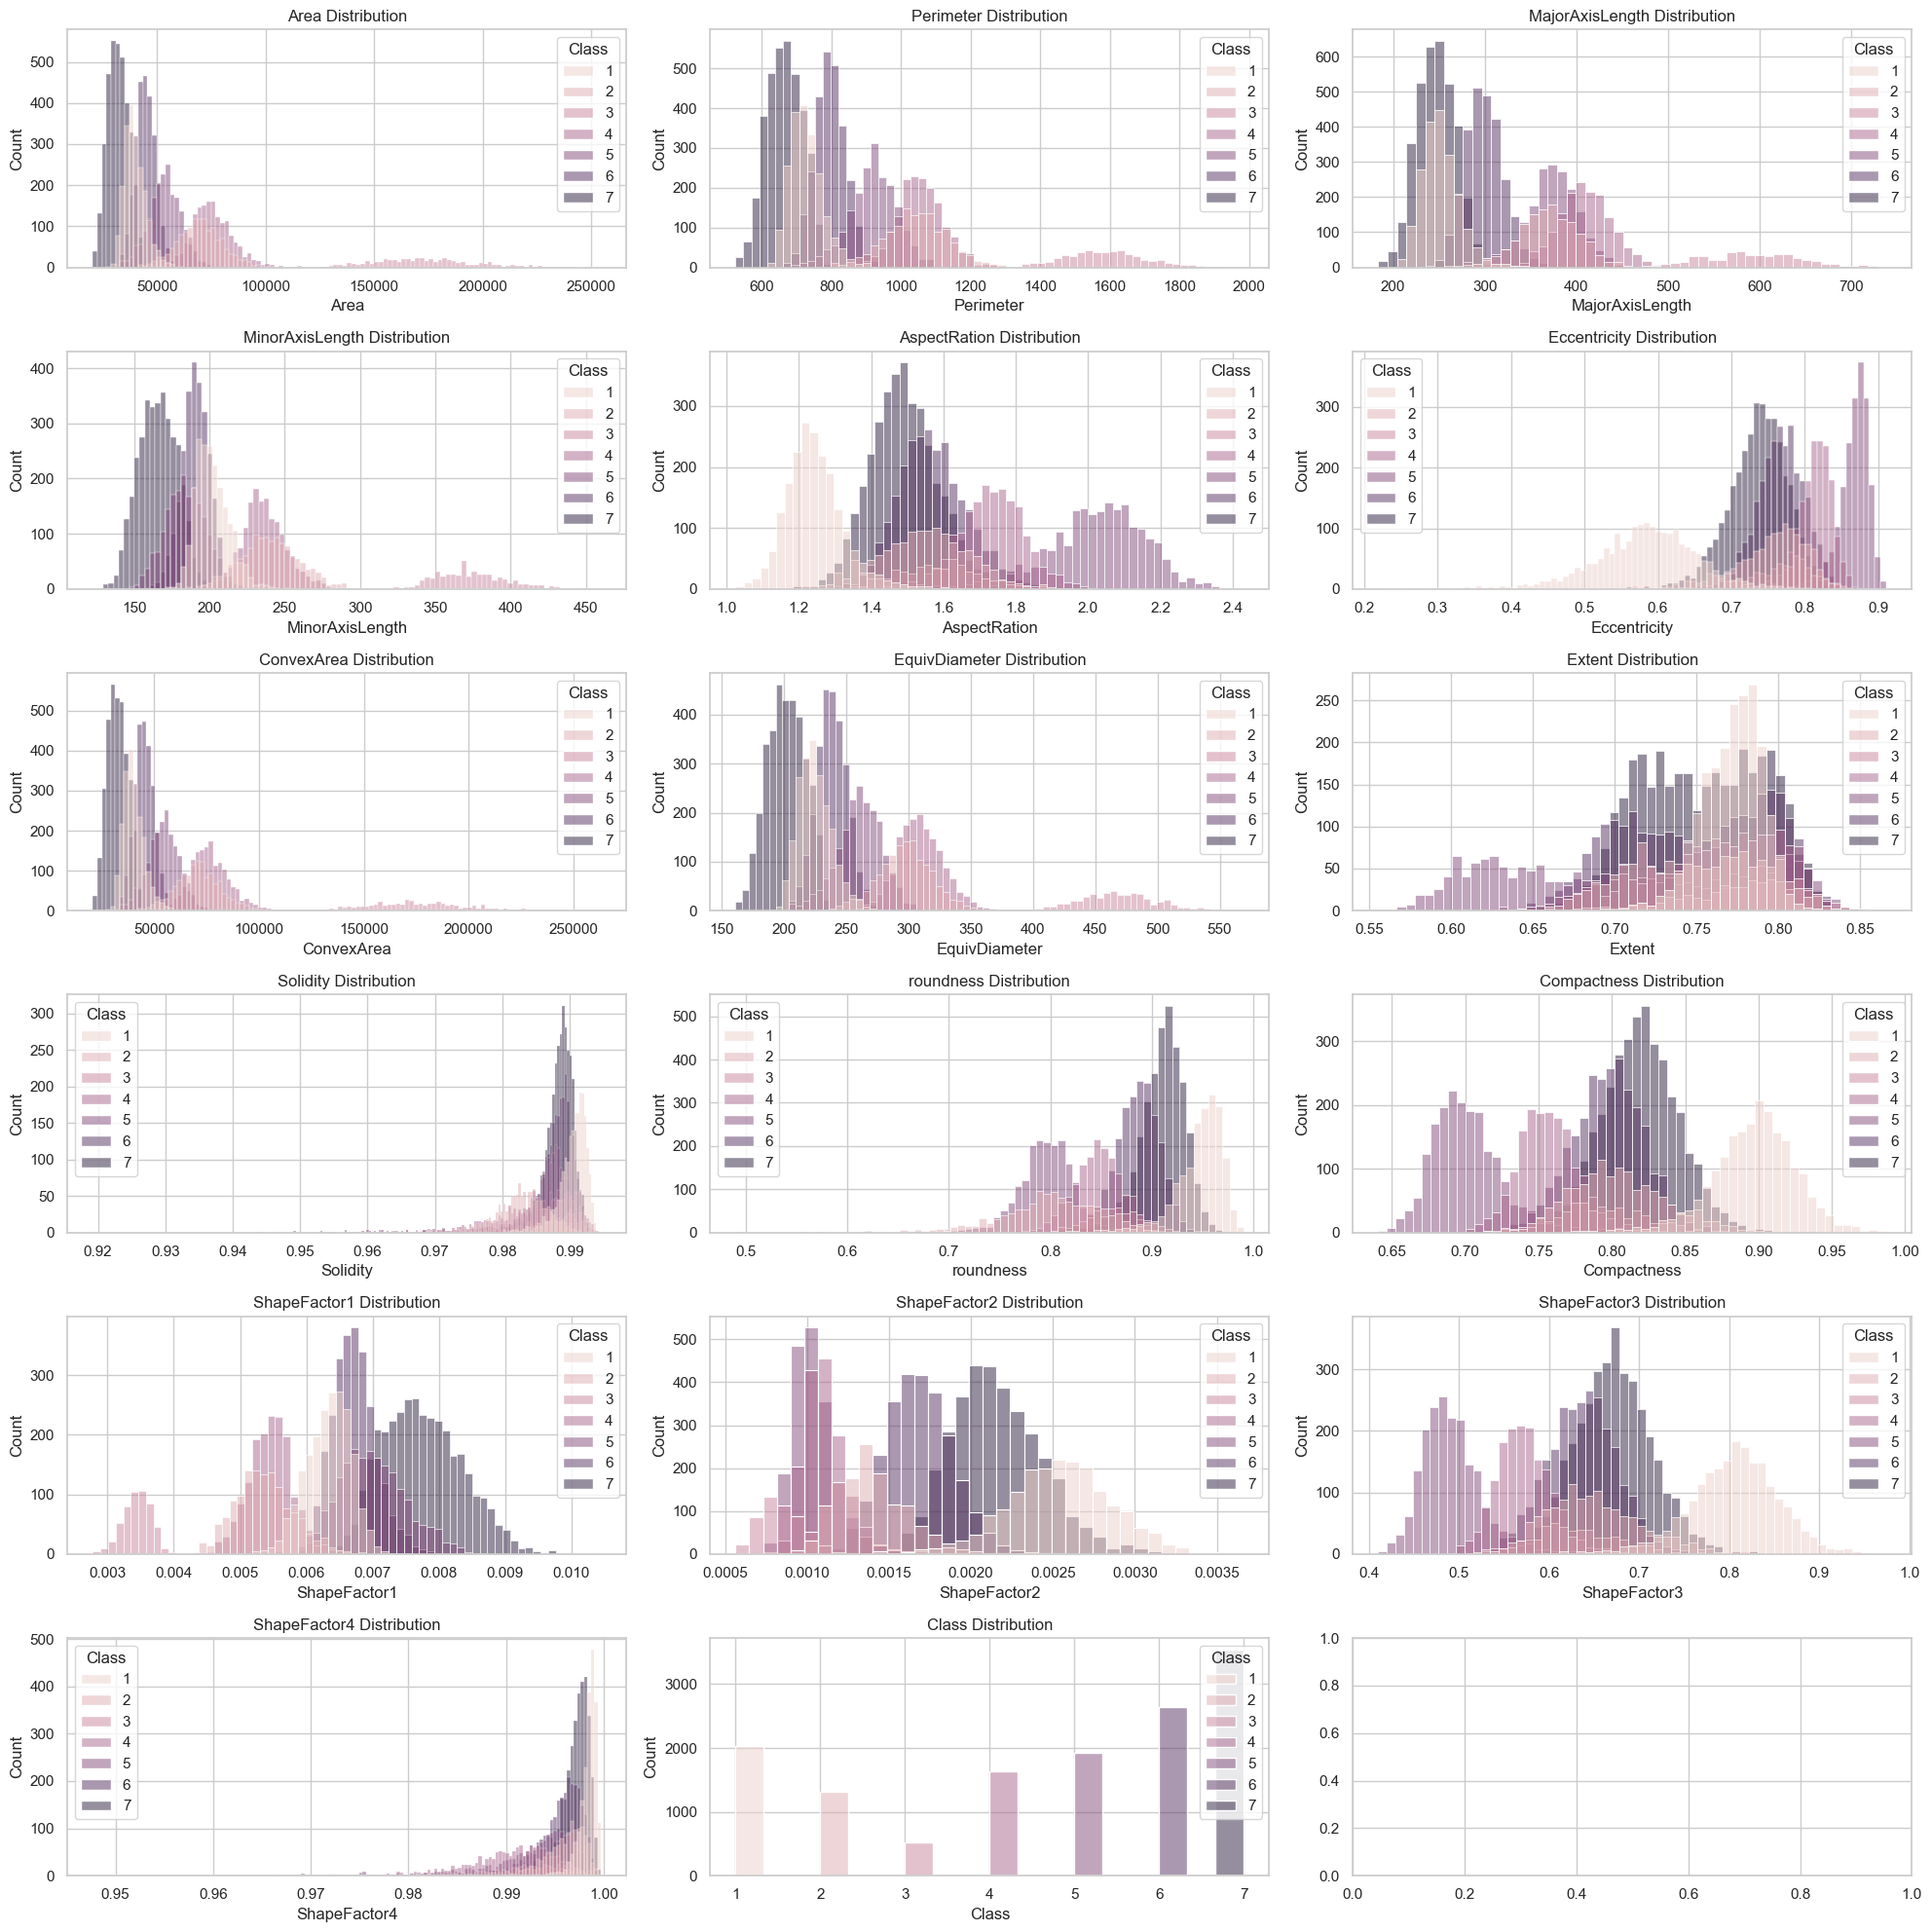

In [112]:
# Visualize the distribution of the Class column with classes 1-7 (rock types) on all data columns to visualize the data distribution to see if linearly seperable
fig, axes = plt.subplots(6, 3, figsize=(20, 20))  # Adjusted grid size to 6 rows
for i, column in enumerate(rock_data.columns):
    sns.histplot(data=rock_data, x=column, hue="Class", ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f"{column} Distribution")
plt.tight_layout()
plt.show()

#### 1.1.3 Bar Plot
- We will check imbalance in dataset using barplot

- Dominant Classes:

    - Class 7 has the most samples (3546), accounting for a significant portion of the dataset.
    - Class 6 (2636 samples) and Class 1 (2027 samples) are also relatively well-represented.

- Minority Classes:

    - Classes 2, 3, and 4 have significantly fewer samples, with Class 3 being the smallest (522 samples).

- Imbalance:
The largest class (7) has over 6 times the number of samples compared to the smallest class (3).
This imbalance can lead to issues during training, as the classifier may be biased toward the majority classes, resulting in poor performance on minority classes.

Class Distribution: 
7: 3546 samples
6: 2636 samples
1: 2027 samples
5: 1928 samples
4: 1630 samples
2: 1322 samples
3: 522 samples


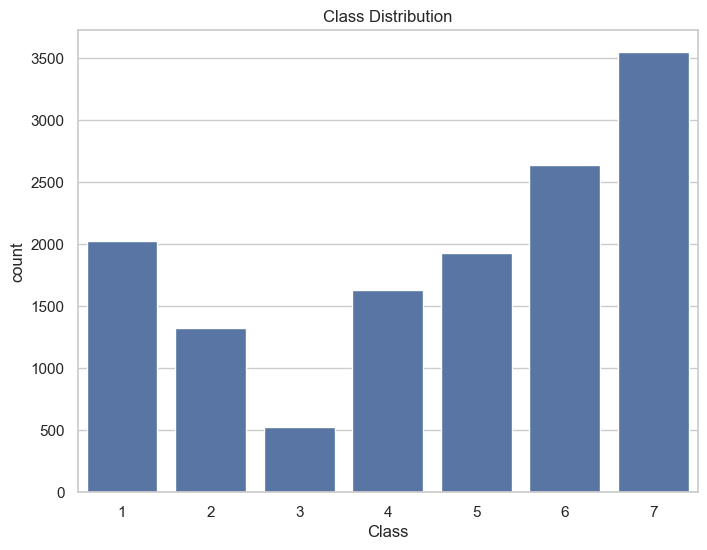

In [113]:
# checking imbalance
print("Class Distribution: ")
for class_name, count in rock_data["Class"].value_counts().items():
    print(f"{class_name}: {count} samples")


# Bar plot of class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x="Class", data=rock_data)
plt.title("Class Distribution")
plt.show()

We can use class weights in the SVM model to penalize misclassification of minority classes more heavily. This can be done using the `class_weight='balanced'` parameter in scikit-learn's SVM implementation.

### 1.2 Data Preprocessing

#### 1.2.1 Split into train and test set

In [114]:
# Splitting the dataset
X = rock_data.drop("Class", axis=1)
y = rock_data["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### 1.2.2 Feature Scaling

In [115]:
scaler = StandardScaler()

# Scaling the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# show the scaled data
print("Scaled Training Data:")
print(X_train_scaled)

Scaled Training Data:
[[-0.82004684 -1.02202571 -0.9916898  ...  0.87409658  0.26508427
   0.34316271]
 [-0.50936012 -0.46410379 -0.56941112 ...  0.3255146   0.16383972
   0.04702776]
 [-0.7548078  -0.95078365 -1.04911073 ...  1.38029923  1.01678555
   0.34322857]
 ...
 [ 1.27973353  1.42053356  1.60855361 ... -1.30159271 -0.95796901
  -0.24362733]
 [-0.49781492 -0.66962309 -0.85527186 ...  1.41306431  1.61953833
   0.85939177]
 [ 0.37072934  0.67304599  0.9513581  ... -1.2270684  -1.41055323
  -1.00995089]]


#### 1.2.3 Outlier Detection

- Using Z-Score:

    - Measures how far a data point is from the mean in terms of standard deviations.
    - ∣Z∣>3 are often considered outliers.

Box Plots:


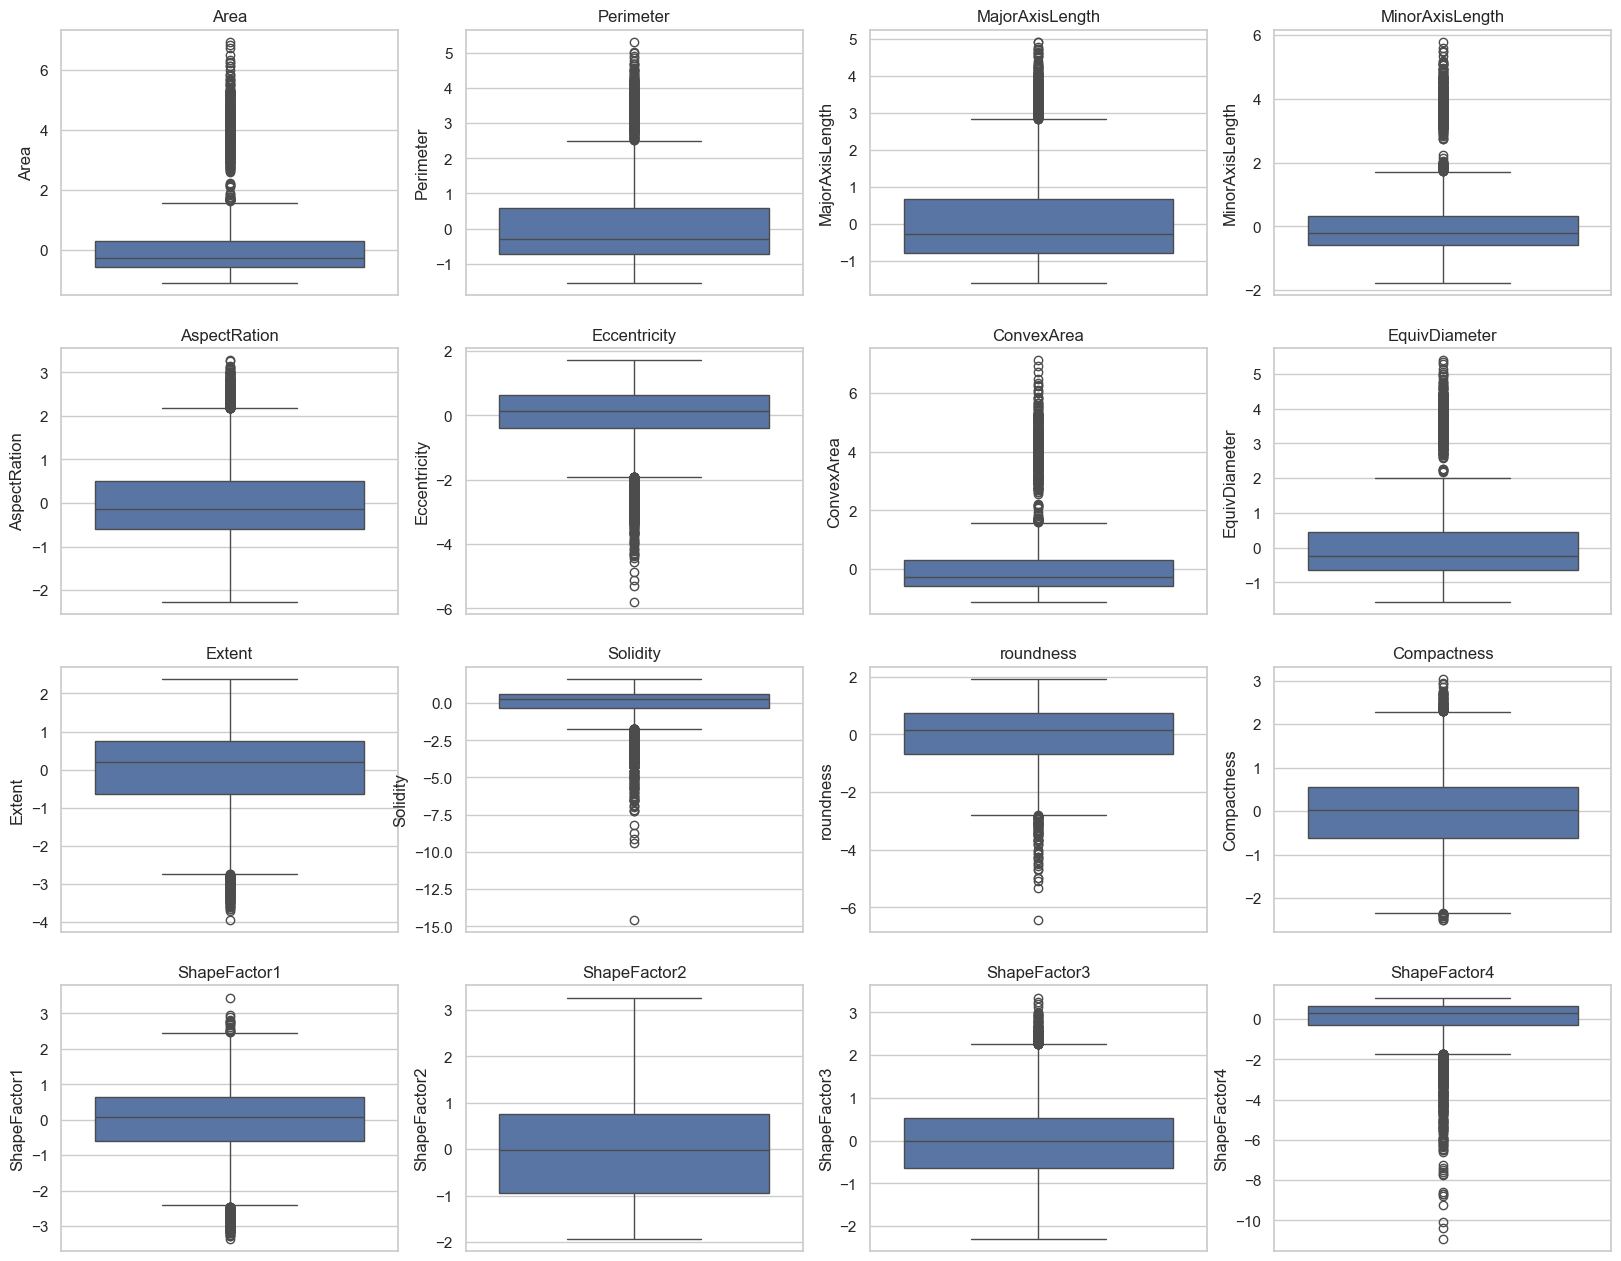

Histograms:


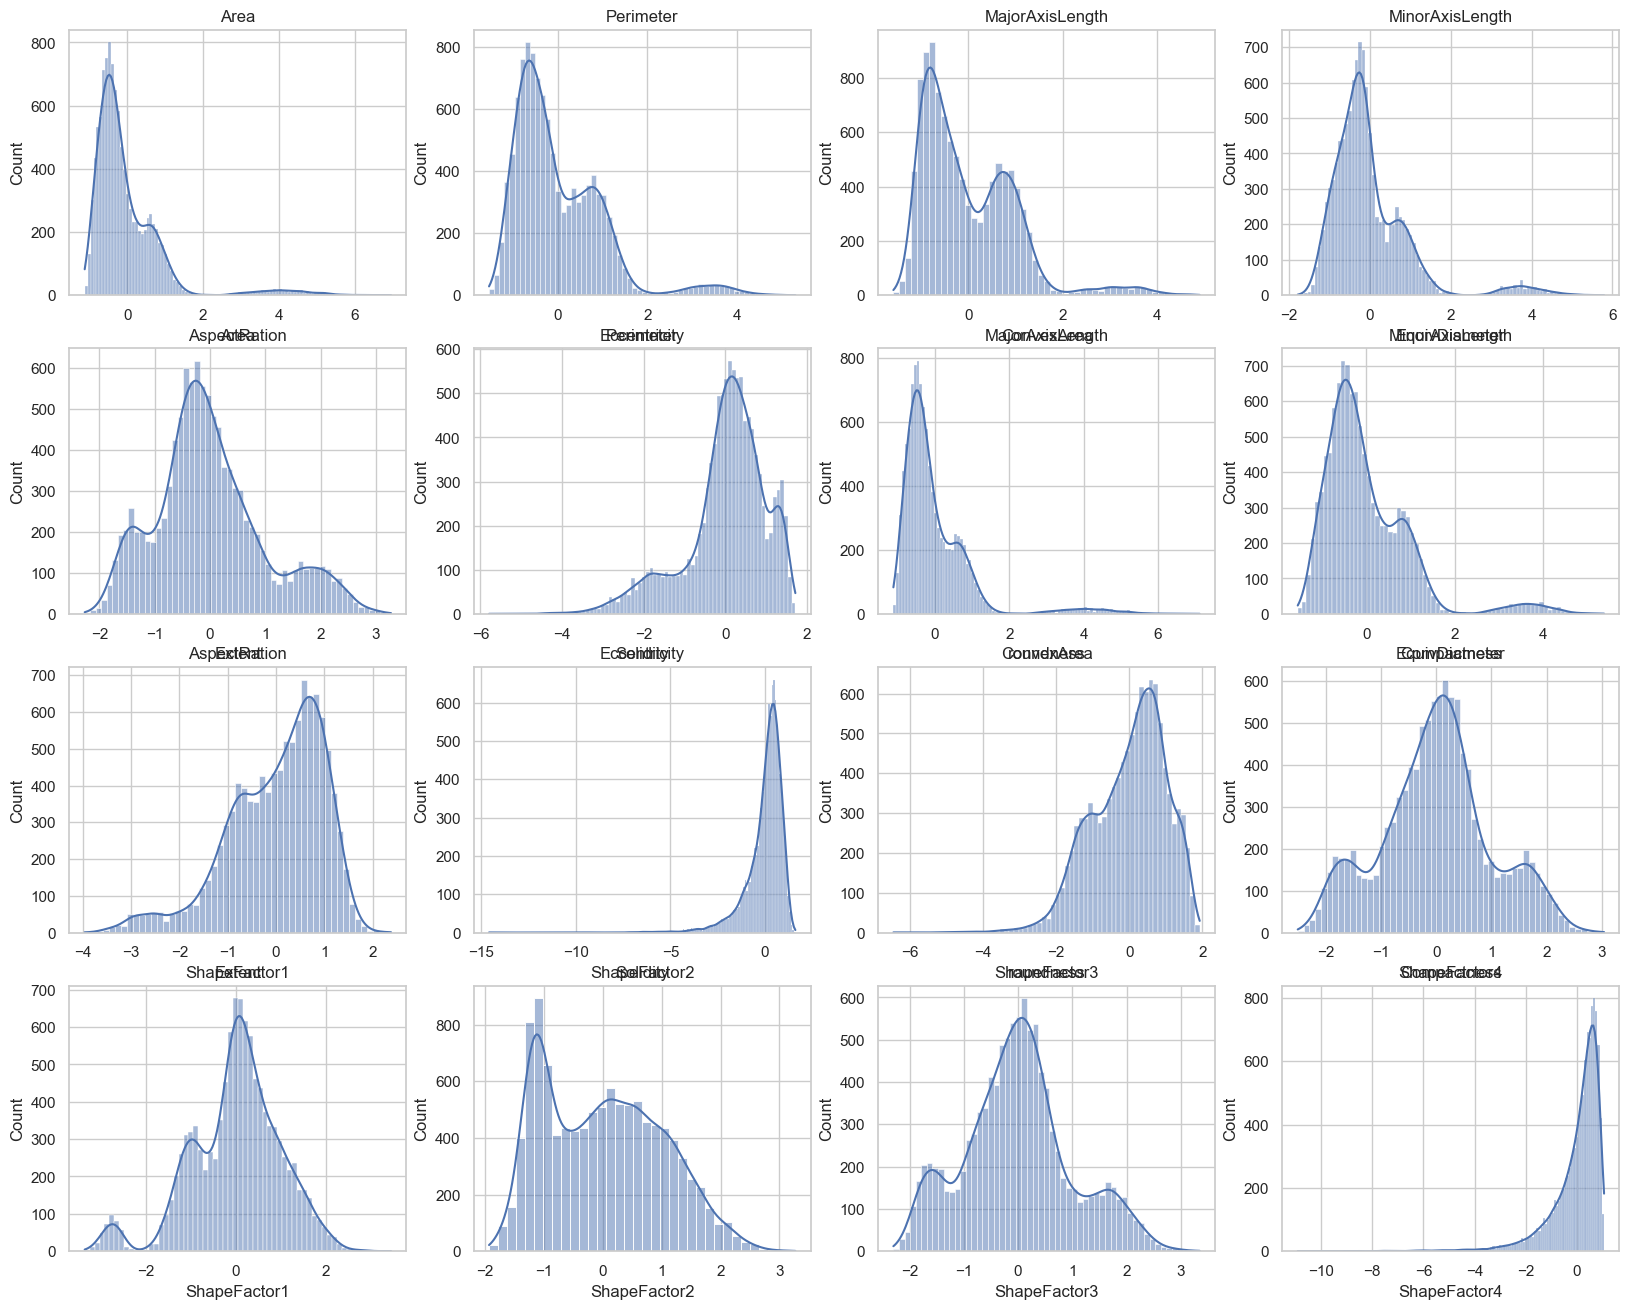

In [116]:
# detecting outliers using individual box plots
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

print("Box Plots:")
plt.figure(figsize=(20, 20))
for i, col in enumerate(X_train_scaled_df.columns, start=1):
    plt.subplot(5, 4, i)
    sns.boxplot(y=X_train_scaled_df[col])
    plt.title(col)
plt.show()

print("Histograms:")
plt.figure(figsize=(20, 20))
for i, col in enumerate(X_train_scaled_df.columns, start=1):
    plt.subplot(5, 4, i)
    sns.histplot(X_train_scaled_df[col], kde=True)
    plt.title(col)
plt.show()

#### 1.2.4 Removing Outliers

Training Data Shape Before Removing Outliers: (10888, 16)
Training Data Shape After Removing Outliers: (10012, 16)
Box Plots After Removing Outliers:


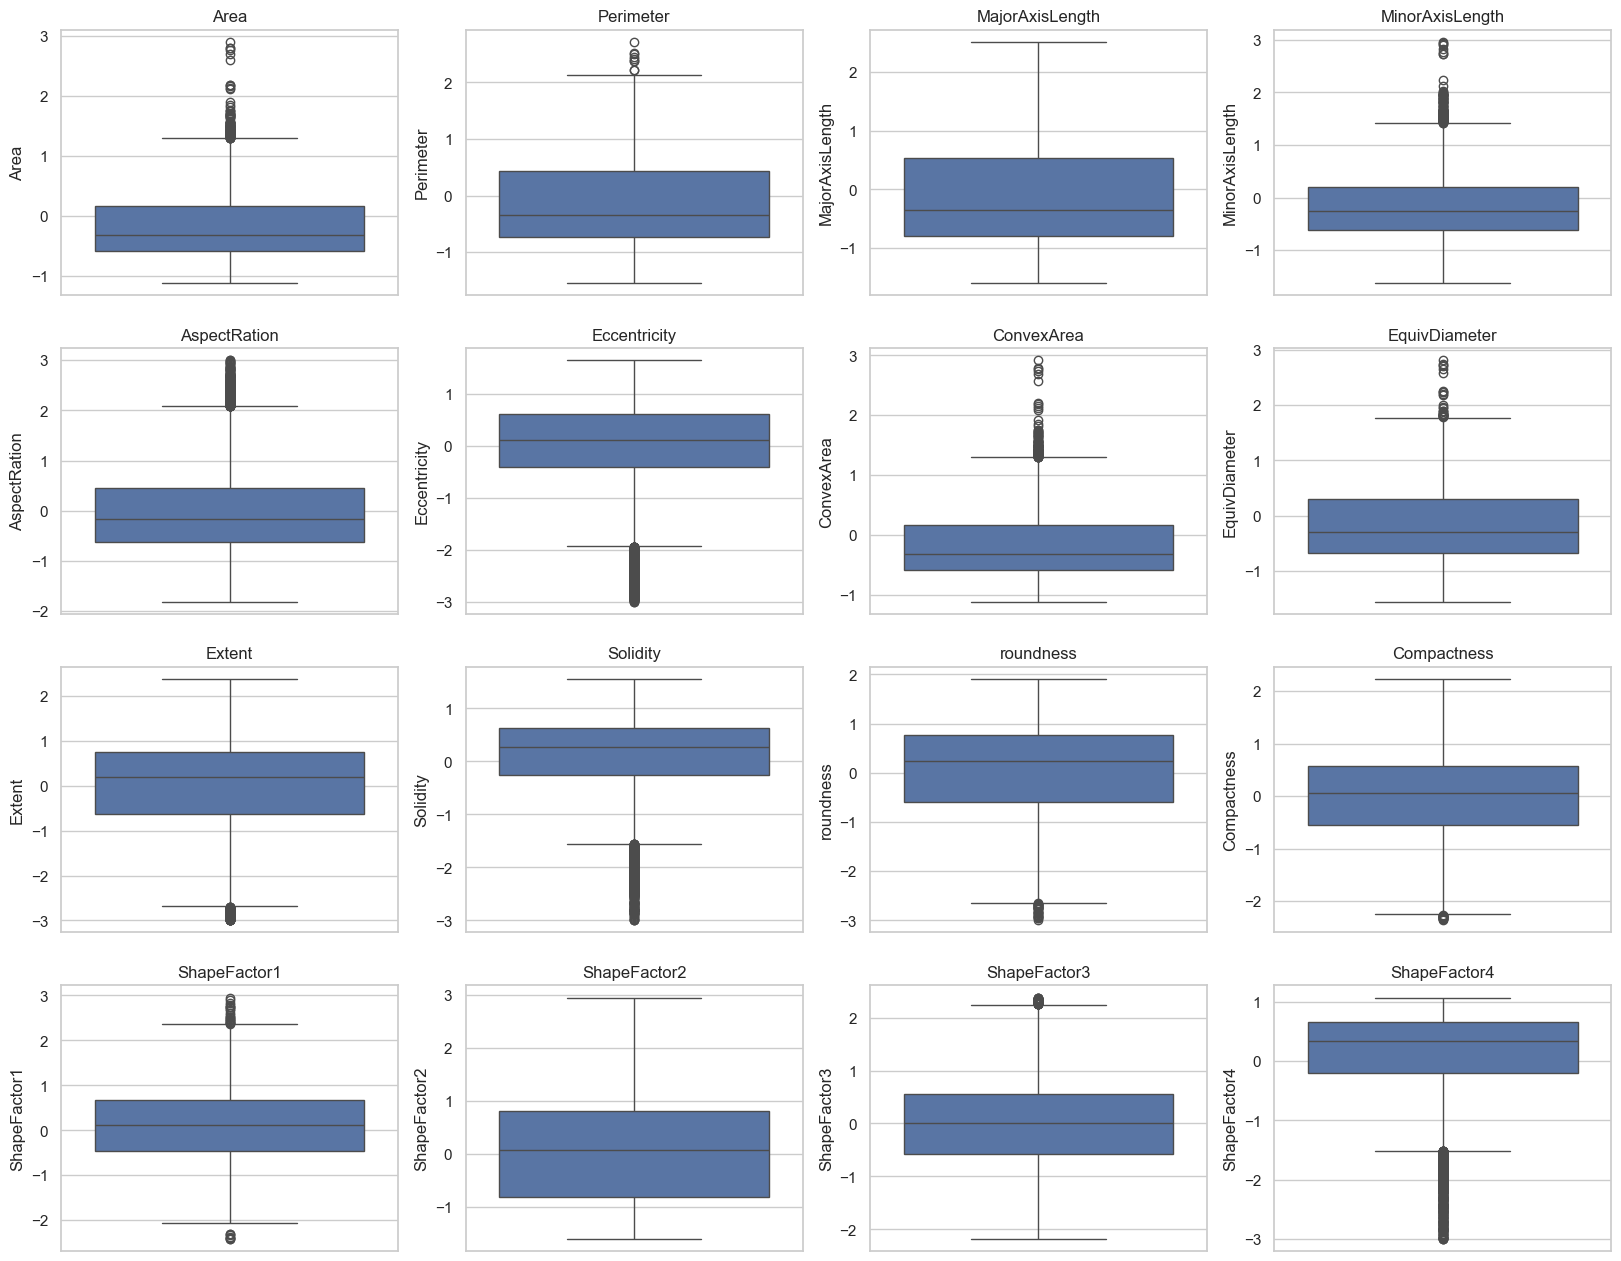

Histograms After Removing Outliers:


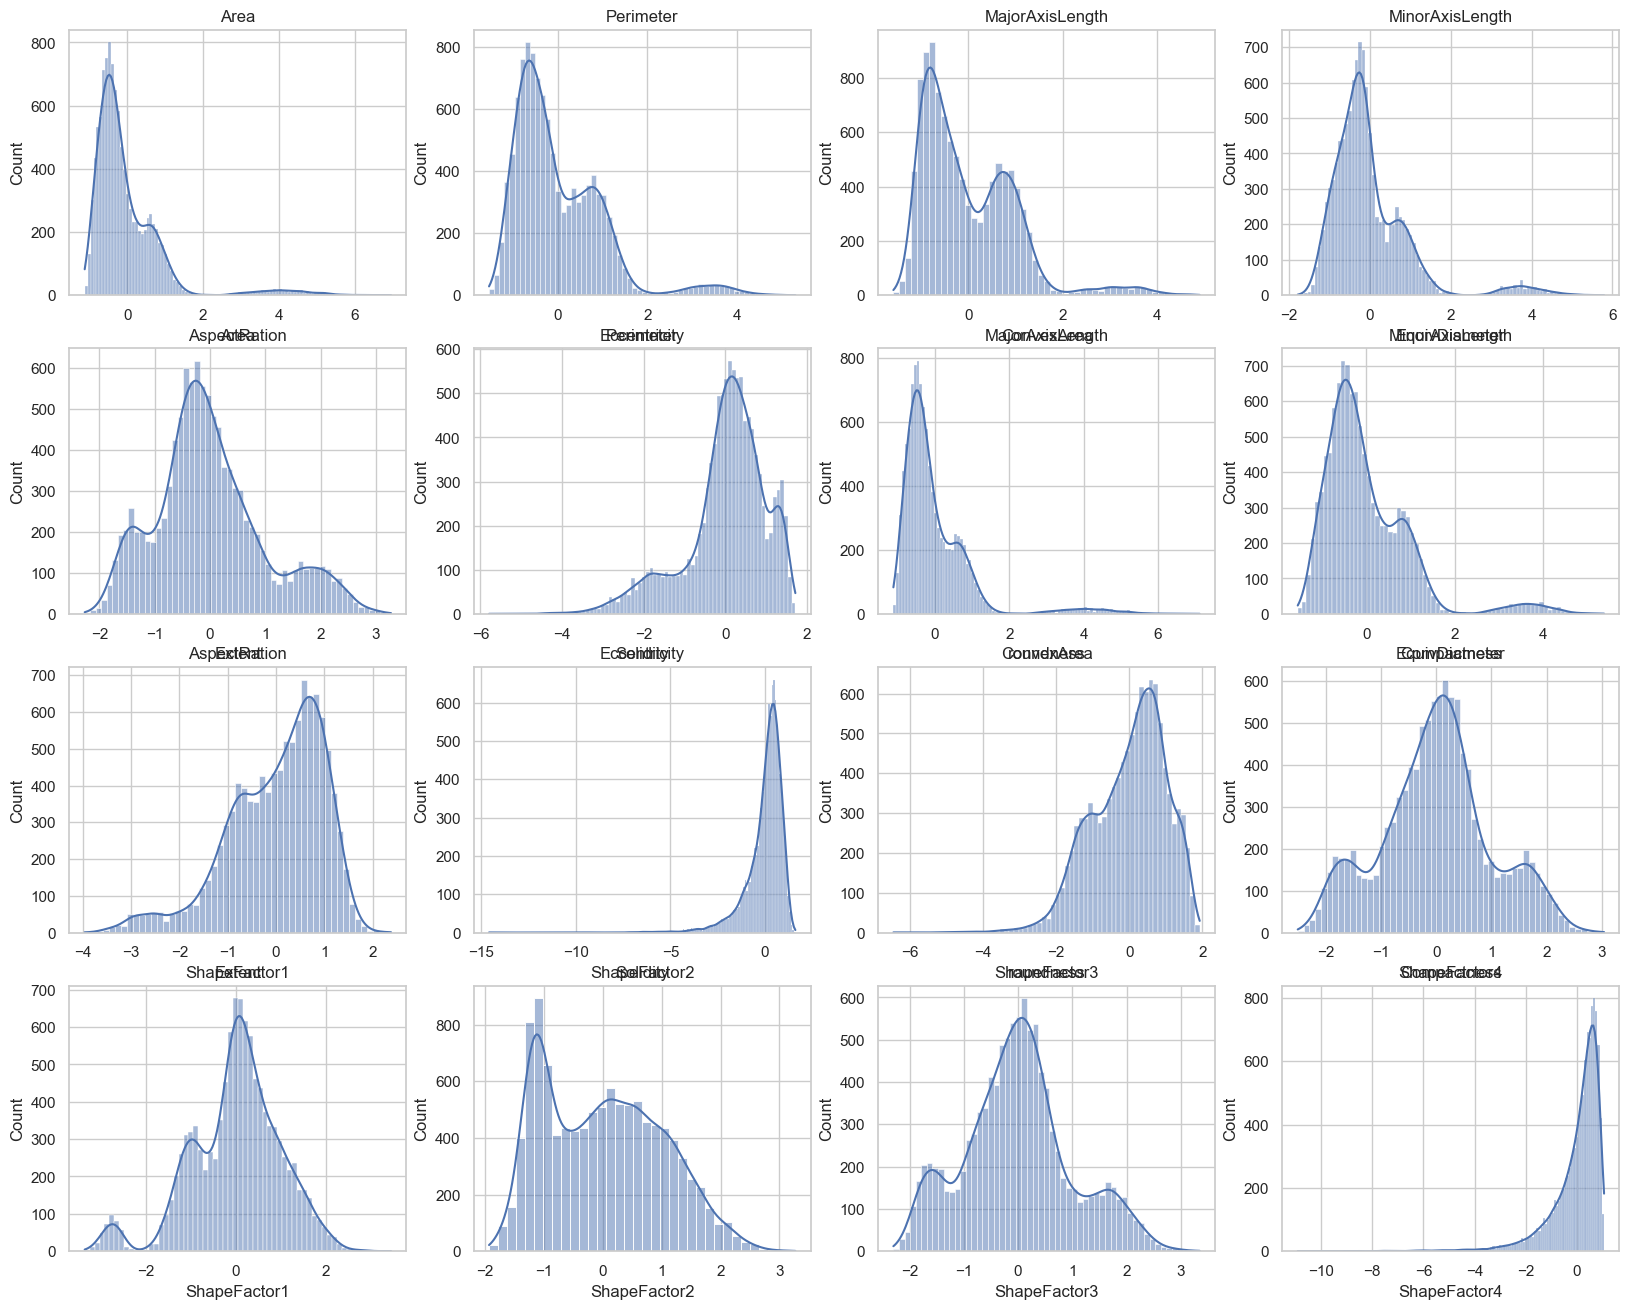

In [117]:
z_scores = np.abs(stats.zscore(X_train_scaled))
threshold = 3

print("Training Data Shape Before Removing Outliers:", X_train_scaled.shape)

# Removing outliers
X_train_no_outliers = X_train_scaled[(z_scores < threshold).all(axis=1)]
y_train_no_outliers = y_train[(z_scores < threshold).all(axis=1)]

# show the shape of the data after removing outliers
print("Training Data Shape After Removing Outliers:", X_train_no_outliers.shape)

# Draw Box plot after removing outliers
X_train_no_outliers_df = pd.DataFrame(X_train_no_outliers, columns=X.columns)

print("Box Plots After Removing Outliers:")
plt.figure(figsize=(20, 20))
for i, col in enumerate(X_train_no_outliers_df.columns, start=1):
    plt.subplot(5, 4, i)
    sns.boxplot(y=X_train_no_outliers_df[col])
    plt.title(col)
plt.show()

print("Histograms After Removing Outliers:")
plt.figure(figsize=(20, 20))
for i, col in enumerate(X_train_scaled_df.columns, start=1):
    plt.subplot(5, 4, i)
    sns.histplot(X_train_scaled_df[col], kde=True)
    plt.title(col)
plt.show()

- After removing our outliers, we lost about `876` rows in our train dataset but our outliers have been reduced.

#### 1.2.5 Feature Selection

In [118]:
# feature selection using random forest
rf = RandomForestClassifier()
rf.fit(X_train_no_outliers, y_train_no_outliers)

# Feature Importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

print("Feature Importance:")
print(feature_importances)

Feature Importance:
Perimeter          0.115589
ShapeFactor1       0.090465
ShapeFactor3       0.089807
Compactness        0.083190
ConvexArea         0.082859
MajorAxisLength    0.073582
MinorAxisLength    0.072338
AspectRation       0.072002
Eccentricity       0.071779
roundness          0.059147
EquivDiameter      0.046275
ShapeFactor2       0.041929
Area               0.039803
ShapeFactor4       0.030720
Solidity           0.018623
Extent             0.011893
dtype: float64


- from feature selection using correlation matrix and feature importance using trees, we can select the following features:

    - Perimeter         
    - Compactness        
    - ShapeFactor3       
    - ShapeFactor1       
    - MinorAxisLength    
    - MajorAxisLength    
    - ConvexArea         
    - Eccentricity       
    - roundness          
    - EquivDiameter      
    - AspectRation       
    - Area               

In [119]:
selected_features = [
    "Perimeter",
    "Compactness",
    "ShapeFactor3",
    "ShapeFactor1",
    "MinorAxisLength",
    "MajorAxisLength",
    "ConvexArea",
    "Eccentricity",
    "roundness",
    "EquivDiameter",
    "AspectRation",
    "Area",
]

X_train_selected = X_train_no_outliers_df[selected_features]
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)
X_test_selected = X_test_scaled_df[selected_features]

### 1.3 SVM Classification - Linear Kernel

#### 1.3.1 Fitting data to model

In [95]:
linear_svm = SVC(kernel='linear', C=1, random_state=42, probability=True)
linear_svm.fit(X_train_selected, y_train_no_outliers)
y_pred_linear = linear_svm.predict(X_test_selected)

#### 1.3.2 Evaluating Model

In [96]:
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("\nLinear SVM Classification Report:")
print(classification_report(y_test, y_pred_linear))
print(f"Linear SVM Accuracy: {accuracy_linear:.2f}")


Linear SVM Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.94      0.94       413
           2       0.92      0.89      0.90       261
           3       1.00      1.00      1.00       117
           4       0.92      0.94      0.93       317
           5       0.97      0.95      0.96       408
           6       0.86      0.88      0.87       536
           7       0.91      0.91      0.91       671

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723

Linear SVM Accuracy: 0.92


#### 1.3.3 Using GridSearchCV to optimize

In [120]:
# # Use GridSearchCV to find the best hyperparameters for the SVM model
param_grid = {
    "C": [0.1, 1, 10, 100],
    "kernel": ["linear"],
    "gamma": ["scale", "auto"],
}

grid_search = GridSearchCV(SVC(random_state=42, probability=True), param_grid, cv=5)
grid_search.fit(X_train_selected, y_train_no_outliers)

print("\nBest Parameters for Linear SVM:")
print(grid_search.best_params_)

# Train the SVM model with the best hyperparameters
best_linear_svm = grid_search.best_estimator_
best_linear_svm.fit(X_train_selected, y_train_no_outliers)
y_pred_best_linear = best_linear_svm.predict(X_test_selected)

print("\nBest Linear SVM Classification Report:")
print(classification_report(y_test, y_pred_best_linear))
print(f"Best Linear SVM Accuracy: {accuracy_score(y_test, y_pred_best_linear):.2f}")


Best Linear SVM Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.94      0.95       413
           2       0.94      0.92      0.93       261
           3       1.00      1.00      1.00       117
           4       0.93      0.95      0.94       317
           5       0.97      0.95      0.96       408
           6       0.86      0.90      0.88       536
           7       0.92      0.91      0.91       671

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723

Best Linear SVM Accuracy: 0.93


#### 1.3.4 K-fold cross validation
- The results of K-fold cross validation indicate that there is little to no overfitting in model.

In [98]:
# K-fold cross-validation
scores = cross_val_score(best_linear_svm, X_train_selected, y_train_no_outliers, cv=5)
print("\nCross Validation Scores:")
print(scores)


Cross Validation Scores:
[0.92161757 0.92361458 0.91258741 0.92207792 0.91658342]


- Class 3 (Support: 117):
    - Perfect precision (100%), recall (100%), and F1-score (100%).
    - This could indicate that this class is linearly separable with minimal overlap with others.
    - But also we have less instances of this class in dataset so might need more instances

- Class 6 (Support: 536):
    - Precision (86%) and recall (90%).
    - Slightly lower precision indicates more false positives for this class, where instances from other classes are being incorrectly classified as Class 6.

- Class 7 (Support: 671):
    - Precision (92%) and recall (91%).
    - Similar to Class 6, there is room for improvement in separating this class from others.

#### 1.3.5 Testing impact of feature selection

- We can see by using less features there is hardly any impact on accuracy so we should use feature selection to minimize number of features required by the model

In [99]:
# Checking impact of feature selection
X_train_all_features = X_train_no_outliers_df
X_test_all_features = X_test_scaled_df

linear_svm_all_features = SVC(kernel='linear', C=100, gamma="scale", random_state=42)
linear_svm_all_features.fit(X_train_all_features, y_train_no_outliers)

y_pred_linear_all_features = linear_svm_all_features.predict(X_test_all_features)

accuracy_linear_all_features = accuracy_score(y_test, y_pred_linear_all_features)
print("\nLinear SVM Classification Report with All Features:")
print(classification_report(y_test, y_pred_linear_all_features))
print(f"Linear SVM Accuracy with All Features: {accuracy_linear_all_features:.2f}")


Linear SVM Classification Report with All Features:
              precision    recall  f1-score   support

           1       0.97      0.95      0.96       413
           2       0.93      0.93      0.93       261
           3       1.00      1.00      1.00       117
           4       0.92      0.94      0.93       317
           5       0.97      0.94      0.95       408
           6       0.87      0.89      0.88       536
           7       0.92      0.92      0.92       671

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723

Linear SVM Accuracy with All Features: 0.93


### 1.4 SVM Classification - Non-Linear Kernel (RBF)

#### 1.4.1 Fitting Data to Model

In [100]:
# Non-Linear SVM Classification (RBF Kernel)
rbf_svm = SVC(kernel="rbf", C=1, gamma="scale", random_state=42, probability=True)
rbf_svm.fit(X_train_selected, y_train_no_outliers)
y_pred_rbf = rbf_svm.predict(X_test_selected)

#### 1.4.2 Evaluating the Model

In [101]:
# Evaluate the RBF SVM model
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("\nRBF SVM Classification Report:")
print(classification_report(y_test, y_pred_rbf))
print(f"RBF SVM Accuracy: {accuracy_rbf:.2f}")


RBF SVM Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.94      0.95       413
           2       0.76      0.87      0.81       261
           3       1.00      0.55      0.71       117
           4       0.91      0.94      0.93       317
           5       0.97      0.95      0.96       408
           6       0.86      0.89      0.88       536
           7       0.91      0.91      0.91       671

    accuracy                           0.90      2723
   macro avg       0.91      0.86      0.88      2723
weighted avg       0.91      0.90      0.90      2723

RBF SVM Accuracy: 0.90


#### 1.4.3 Using GridSearchCV to optimize

In [121]:
param_grid_rbf = {
    "C": [0.1, 1, 10, 100],
    "kernel": ["rbf"],
    "gamma": ["scale", "auto"],
}

grid_search_rbf = GridSearchCV(SVC(random_state=42, probability=True), param_grid_rbf, cv=5)
grid_search_rbf.fit(X_train_selected, y_train_no_outliers)

print("\nBest Parameters for RBF SVM:")
print(grid_search_rbf.best_params_)
best_rbf_svm = grid_search_rbf.best_estimator_
best_rbf_svm.fit(X_train_selected, y_train_no_outliers)
y_pred_best_rbf = best_rbf_svm.predict(X_test_selected)

print("\nBest RBF SVM Classification Report:")
print(classification_report(y_test, y_pred_best_rbf))
print(f"Best RBF SVM Accuracy: {accuracy_score(y_test, y_pred_best_rbf):.2f}")


Best RBF SVM Classification Report:
              precision    recall  f1-score   support

           1       0.86      0.94      0.90       413
           2       0.94      0.89      0.91       261
           3       1.00      0.56      0.71       117
           4       0.92      0.96      0.94       317
           5       0.97      0.94      0.96       408
           6       0.88      0.89      0.88       536
           7       0.90      0.93      0.92       671

    accuracy                           0.91      2723
   macro avg       0.93      0.87      0.89      2723
weighted avg       0.91      0.91      0.91      2723

Best RBF SVM Accuracy: 0.91


#### 1.4.4 K-fold cross validation
- The results of K-fold cross validation indicate that there is little to no overfitting in model.

In [103]:
scores_rbf = cross_val_score(best_rbf_svm, X_train_selected, y_train_no_outliers, cv=5)
print("\nCross Validation Scores for RBF SVM:")
print(scores_rbf)


Cross Validation Scores for RBF SVM:
[0.91662506 0.92261608 0.91208791 0.92457542 0.91358641]


- Class 3 (Support: 117):
    - Precision: 100%, Recall: 55%, and F1-Score: 71%.
    - Perfect precision indicates the model never misclassifies another class as Class 3.
    - However, low recall (55%) shows that nearly half of the true Class 3 instances are being misclassified.

#### 1.4.5 Testing impact of feature selection

- We can see by using less features there is hardly any impact on accuracy so we should use feature selection to minimize number of features required by the model

In [104]:
# checking the impact of feature selection
rbf_svm_all_features = SVC(kernel="rbf", C=100, gamma="scale", random_state=42)
rbf_svm_all_features.fit(X_train_all_features, y_train_no_outliers)

y_pred_rbf_all_features = rbf_svm_all_features.predict(X_test_all_features)

accuracy_rbf_all_features = accuracy_score(y_test, y_pred_rbf_all_features)
print("\nRBF SVM Classification Report with All Features:")
print(classification_report(y_test, y_pred_rbf_all_features))
print(f"RBF SVM Accuracy with All Features: {accuracy_rbf_all_features:.2f}")


RBF SVM Classification Report with All Features:
              precision    recall  f1-score   support

           1       0.82      0.96      0.88       413
           2       0.92      0.91      0.92       261
           3       1.00      0.62      0.76       117
           4       0.93      0.94      0.93       317
           5       0.98      0.89      0.93       408
           6       0.88      0.87      0.88       536
           7       0.90      0.93      0.92       671

    accuracy                           0.90      2723
   macro avg       0.92      0.87      0.89      2723
weighted avg       0.91      0.90      0.90      2723

RBF SVM Accuracy with All Features: 0.90


### 1.5 SVM Classification - Non-Linear Kernel (Poly)

#### 1.5.1 Fitting Data to Model

In [30]:
# Non-Linear SVM Classification (Poly Kernel)
poly_svm = SVC(kernel="poly", C=1, gamma="scale", random_state=42, probability=True)
poly_svm.fit(X_train_selected, y_train_no_outliers)
y_pred_poly = poly_svm.predict(X_test_selected)

#### 1.5.2 Evaluating the Model

In [31]:
# Evaluate the Poly SVM Model
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print("\nPoly SVM Classification Report:")
print(classification_report(y_test, y_pred_poly))
print(f"Poly SVM Accuracy: {accuracy_poly:.2f}")


Poly SVM Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.92      0.95       413
           2       0.92      0.84      0.88       261
           3       1.00      1.00      1.00       117
           4       0.92      0.92      0.92       317
           5       0.98      0.93      0.95       408
           6       0.79      0.91      0.85       536
           7       0.91      0.89      0.90       671

    accuracy                           0.91      2723
   macro avg       0.93      0.92      0.92      2723
weighted avg       0.91      0.91      0.91      2723

Poly SVM Accuracy: 0.91


#### 1.5.3 Using GridSearchCV to optimize

In [32]:
param_grid_poly = {
    "C": [0.1, 1, 10, 100],
    "kernel": ["poly"],
    "degree": [2, 3, 4],
    "gamma": ["scale", "auto"],
}

grid_search_poly = GridSearchCV(SVC(random_state=42, probability=True), param_grid_poly, cv=5)
grid_search_poly.fit(X_train_selected, y_train_no_outliers)

print("\nBest Parameters for Poly SVM:")
print(grid_search_poly.best_params_)
best_poly_svm = grid_search_poly.best_estimator_
best_poly_svm.fit(X_train_selected, y_train_no_outliers)
y_pred_best_poly = best_poly_svm.predict(X_test_selected)

print("\nBest Poly SVM Classification Report:")
print(classification_report(y_test, y_pred_best_poly))
print(f"Best Poly SVM Accuracy: {accuracy_score(y_test, y_pred_best_poly):.2f}")


Best Parameters for Poly SVM:
{'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}

Best Poly SVM Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.92      0.94       413
           2       0.93      0.90      0.91       261
           3       1.00      1.00      1.00       117
           4       0.92      0.95      0.93       317
           5       0.97      0.94      0.95       408
           6       0.86      0.90      0.88       536
           7       0.90      0.92      0.91       671

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723

Best Poly SVM Accuracy: 0.92


#### 1.5.4 K-fold cross validation

In [78]:
scores_poly = cross_val_score(best_poly_svm, X_train_selected, y_train_no_outliers, cv=5)
print("\nCross Validation Scores for Poly SVM:")
print(scores_poly)


Cross Validation Scores for Poly SVM:
[0.91612581 0.92611083 0.91058941 0.92007992 0.91458541]


### 1.6 Model Evaluation and Comparison

#### 1.6.1 Confusion matrices

##### Linear SVM


Linear SVM Confusion Matrix:


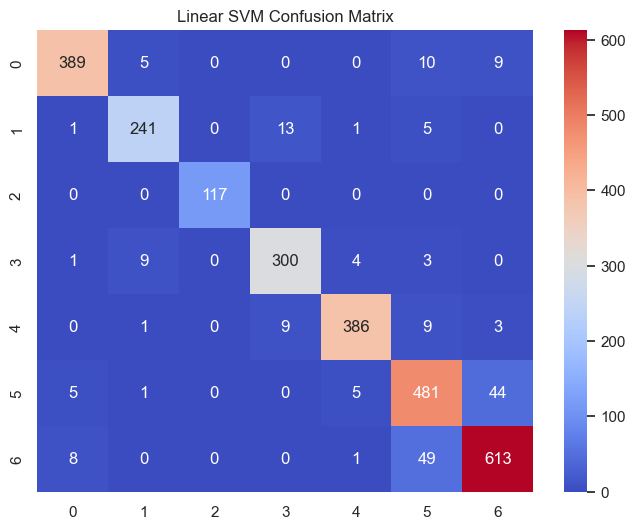

In [34]:
# linear svm confusion matrix
print("\nLinear SVM Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(
    confusion_matrix(y_test, y_pred_best_linear),
    annot=True,
    fmt="d",
    cmap="coolwarm",
)
plt.title("Linear SVM Confusion Matrix")
plt.show()

##### Non-Linear SVM (RBF)


RBF SVM Confusion Matrix:


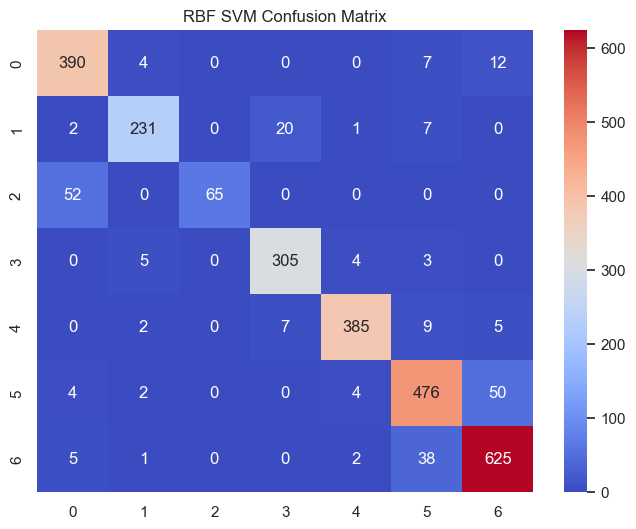

In [35]:
# rbf svm confusion matrix
print("\nRBF SVM Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(
    confusion_matrix(y_test, y_pred_best_rbf),
    annot=True,
    fmt="d",
    cmap="coolwarm",
)
plt.title("RBF SVM Confusion Matrix")
plt.show()

##### Non-Linear SVM (Poly)


Poly SVM Confusion Matrix:


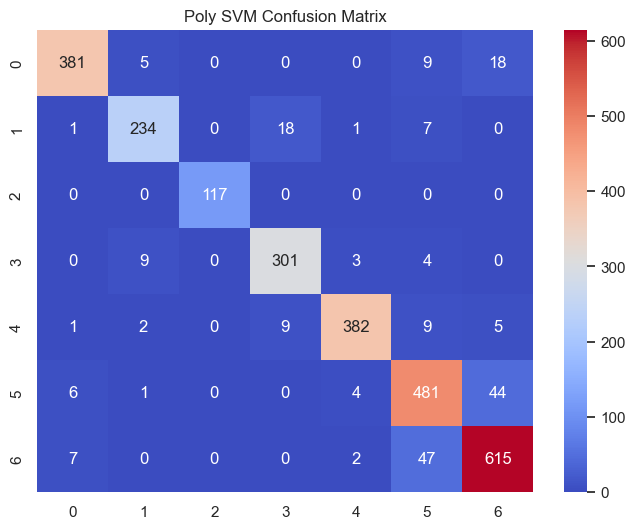

In [36]:
# poly svm confusion matrix
print("\nPoly SVM Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(
    confusion_matrix(y_test, y_pred_best_poly),
    annot=True,
    fmt="d",
    cmap="coolwarm",
)
plt.title("Poly SVM Confusion Matrix")
plt.show()

#### 1.6.2 Decision Boundaries

##### Function

In [37]:
# Visualize the decision boundary
def plot_decision_boundary(model, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", s=20)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("Decision Boundary")

##### Plotting The Boundaries of all classifiers


Linear SVM Classification Report with PCA:
              precision    recall  f1-score   support

           1       0.94      0.93      0.94       413
           2       0.73      0.60      0.66       261
           3       1.00      1.00      1.00       117
           4       0.73      0.81      0.77       317
           5       0.97      0.95      0.96       408
           6       0.84      0.88      0.86       536
           7       0.91      0.90      0.90       671

    accuracy                           0.88      2723
   macro avg       0.87      0.87      0.87      2723
weighted avg       0.88      0.88      0.87      2723

Linear SVM Accuracy with PCA: 0.88

RBF SVM Classification Report with PCA:
              precision    recall  f1-score   support

           1       0.96      0.94      0.95       413
           2       0.66      0.57      0.61       261
           3       0.98      0.34      0.51       117
           4       0.69      0.87      0.77       317
           5

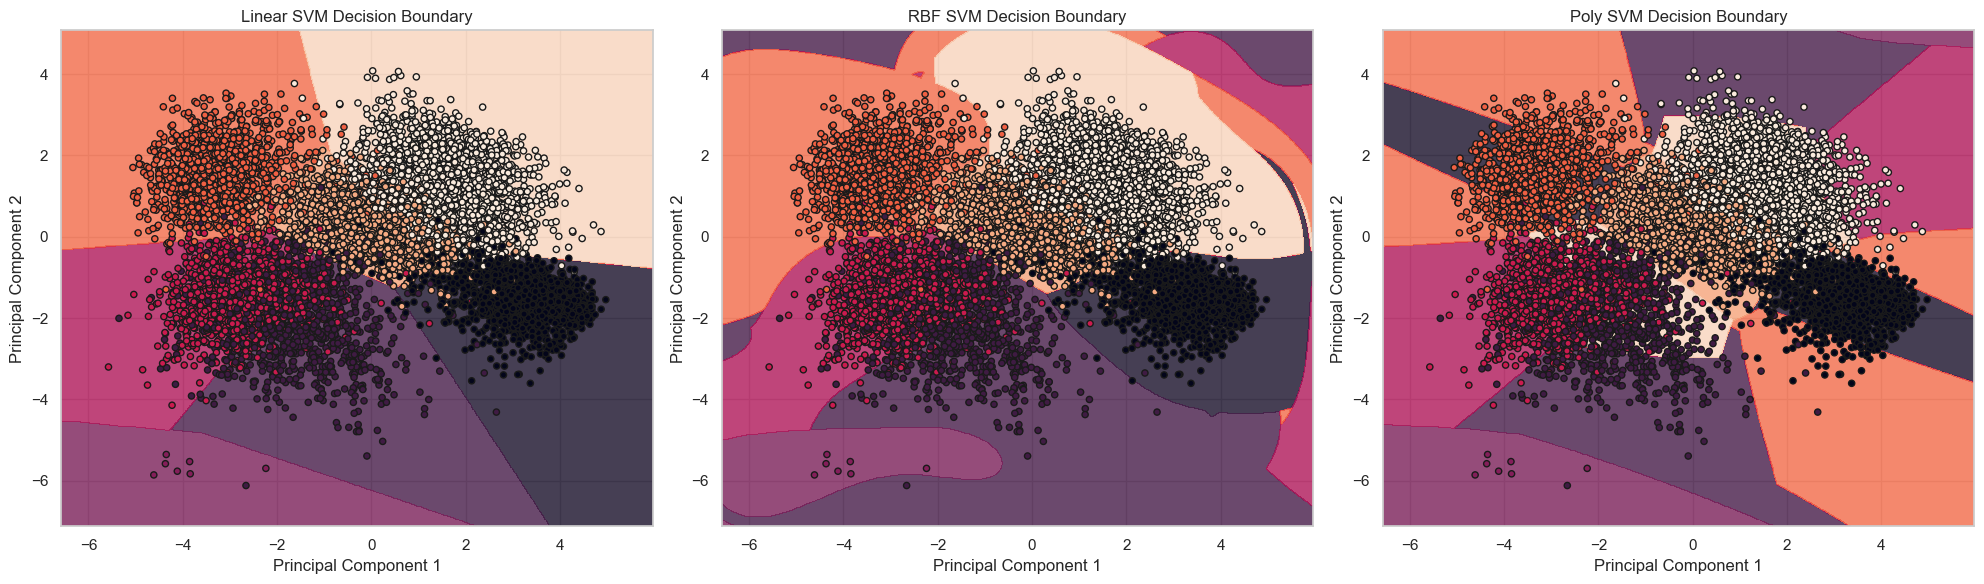

In [38]:
# using PCA to visualize decision boundary
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_selected)
X_test_pca = pca.transform(X_test_selected)

# Linear SVM with PCA
best_linear_svm.fit(X_train_pca, y_train_no_outliers)
y_pred_pca_linear = best_linear_svm.predict(X_test_pca)

accuracy_pca_linear = accuracy_score(y_test, y_pred_pca_linear)
print("\nLinear SVM Classification Report with PCA:")
print(classification_report(y_test, y_pred_pca_linear))
print(f"Linear SVM Accuracy with PCA: {accuracy_pca_linear:.2f}")

# RBF SVM with PCA
best_rbf_svm.fit(X_train_pca, y_train_no_outliers)
y_pred_pca_rbf = best_rbf_svm.predict(X_test_pca)

accuracy_pca_rbf = accuracy_score(y_test, y_pred_pca_rbf)
print("\nRBF SVM Classification Report with PCA:")
print(classification_report(y_test, y_pred_pca_rbf))
print(f"RBF SVM Accuracy with PCA: {accuracy_pca_rbf:.2f}")

# Poly SVM with PCA
best_poly_svm.fit(X_train_pca, y_train_no_outliers)
y_pred_pca_poly = best_poly_svm.predict(X_test_pca)

accuracy_pca_poly = accuracy_score(y_test, y_pred_pca_poly)
print("\nPoly SVM Classification Report with PCA:")
print(classification_report(y_test, y_pred_pca_poly))
print(f"Poly SVM Accuracy with PCA: {accuracy_pca_poly:.2f}")

plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plot_decision_boundary(best_linear_svm, X_train_pca, y_train_no_outliers)
plt.title("Linear SVM Decision Boundary")

plt.subplot(1, 3, 2)
plot_decision_boundary(best_rbf_svm, X_train_pca, y_train_no_outliers)
plt.title("RBF SVM Decision Boundary")

plt.subplot(1, 3, 3)
plot_decision_boundary(best_poly_svm, X_train_pca, y_train_no_outliers)
plt.title("Poly SVM Decision Boundary")

plt.tight_layout()
plt.show()

#### 1.6.3 ROC-AUC

##### Function

In [39]:
# ROC Curve
def plot_roc_curve(model, X, y):
    y_score = model.decision_function(X)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(7):
        fpr[i], tpr[i], _ = roc_curve(y == i + 1, y_score[:, i])
        roc_auc[i] = roc_auc_score(y == i + 1, y_score[:, i])

    plt.figure(figsize=(10, 8))
    for i in range(7):
        plt.plot(fpr[i], tpr[i], label=f"Class {i + 1} (AUC = {roc_auc[i]:.2f})")

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

##### Linear SVM


ROC AUC Score: 0.9861972268882091


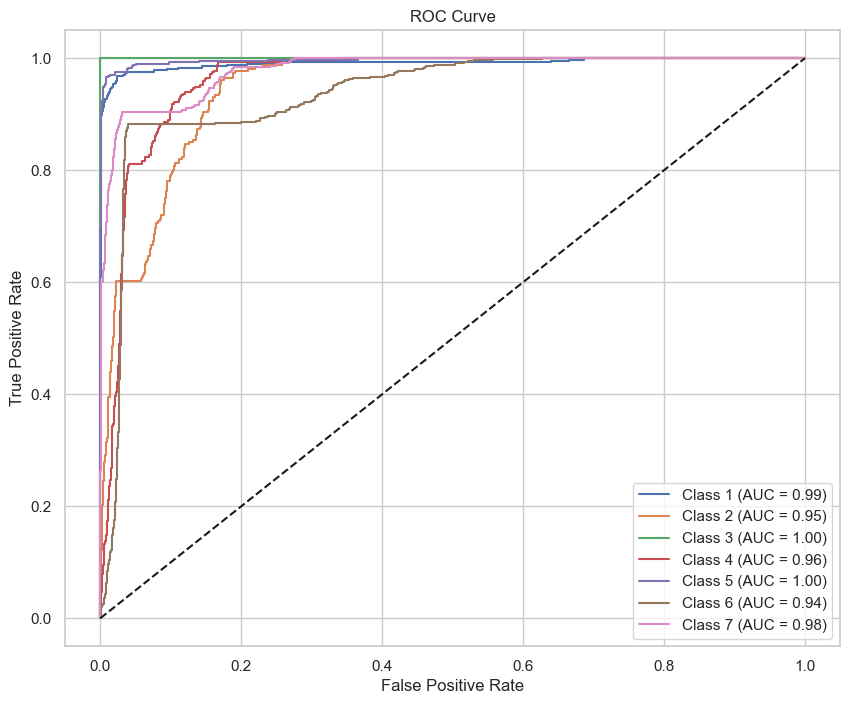

In [40]:
# ROC AUC Score of Linear SVM
y_score_linear = best_linear_svm.predict_proba(X_test_pca)
roc_auc_linear = roc_auc_score(y_test, y_score_linear, multi_class="ovr")

print("\nROC AUC Score:", roc_auc_linear)

plot_roc_curve(best_linear_svm, X_test_pca, y_test)


##### Non-Linear SVM (RBF)


ROC AUC Score for RBF SVM: 0.9806931380905077


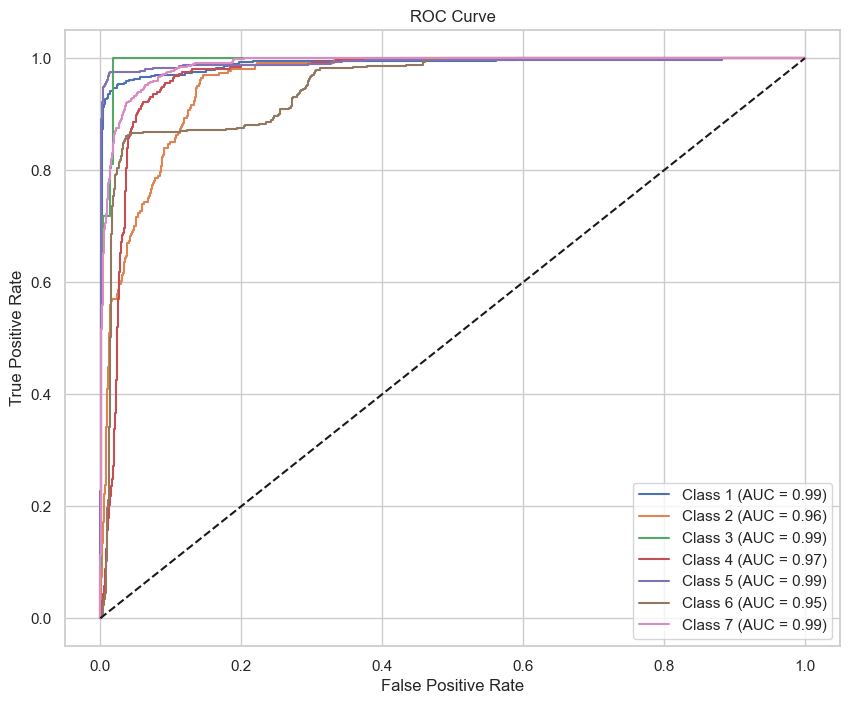

In [41]:
y_score_rbf = best_rbf_svm.predict_proba(X_test_pca)
roc_auc_rbf = roc_auc_score(y_test, y_score_rbf, multi_class="ovr")

print("\nROC AUC Score for RBF SVM:", roc_auc_rbf)

plot_roc_curve(best_rbf_svm, X_test_pca, y_test)

##### Non-Linear SVM (Poly)


ROC AUC Score for Poly SVM: 0.9281528754758605


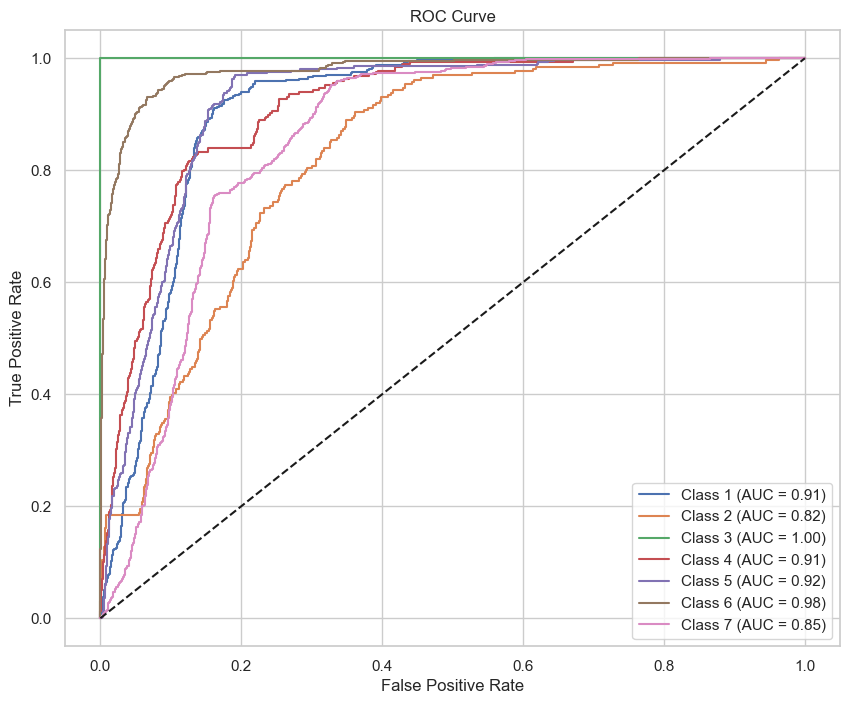

In [42]:
y_score_poly = best_poly_svm.predict_proba(X_test_pca)
roc_auc_poly = roc_auc_score(y_test, y_score_poly, multi_class="ovr")

print("\nROC AUC Score for Poly SVM:", roc_auc_poly)

plot_roc_curve(best_poly_svm, X_test_pca, y_test)

### 1.7 Saving Model and Modified Dataset

In [72]:
# save the model and modified dataset
joblib.dump(best_linear_svm, "best_rock_linear_svm_model.pkl")
joblib.dump(best_rbf_svm, "best_rock_rbf_svm_model.pkl")
joblib.dump(best_poly_svm, "best_rock_poly_svm_model.pkl")

X_train_selected_df = pd.DataFrame(np.concatenate([X_train_selected, y_train_no_outliers.values.reshape(-1, 1)], axis=1), columns=selected_features + ["Class"])
X_test_selected_df = pd.DataFrame(np.concatenate([X_test_selected, y_test.values.reshape(-1, 1)], axis=1), columns=selected_features + ["Class"])
combined_df = pd.concat([X_train_selected_df, X_test_selected_df])

X_train_selected_df.to_csv("modified_rock_classification_dataset_train.csv", index=False)
X_test_selected_df.to_csv("modified_rock_classification_dataset_test.csv", index=False)
combined_df.to_csv("updated_data_classification.csv", index=False)

print("Models and Modified Datasets Saved Successfully!")

Models and Modified Datasets Saved Successfully!


## 2. Regression Task (Theme Park Visitor Dataset)

### 2.1 Load and Explore the Dataset

- We can see from the shape of the data that the dataset has 17379 rows and 17 columns

In [123]:
theme_park_data = pd.read_csv("theme_park_visitor_count_dataset.csv")

# Data Exploration
print("Dataset Shape:", theme_park_data.shape)
print("Dataset Preview:")
theme_park_data.head()

Dataset Shape: (17379, 17)
Dataset Preview:


instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  01/01/2011       1   0     1   0        0        6           0   
1        2  01/01/2011       1   0     1   1        0        6           0   
2        3  01/01/2011       1   0     1   2        0        6           0   
3        4  01/01/2011       1   0     1   3        0        6           0   
4        5  01/01/2011       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

- The data has no missing values we can see so we don't neet to fill or drop missing values

In [124]:
print("\nMissing Values:")
theme_park_data.isnull().sum()


Missing Values:


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### 2.1.1 Dropping Unnecassary Column
- We can drop the `dteday` column as it doesn't effect the dataset and can be inferred from columns such as `yr`, `mnth`, `weekday`.
- We can also drop the `instant` column as it is just used to identify if a record is duplicate or unique
- We can drop `casual` and `registered` columns as they can be used to directly calculate the `cnt` target column as this column is sum of `casual` and `registered`.

In [125]:
# Drop the dteday column
theme_park_data.drop("dteday", axis=1, inplace=True)
# Drop the instant column
theme_park_data.drop("instant", axis=1, inplace=True)
# Drop the casual column
theme_park_data.drop("casual", axis=1, inplace=True)
# Drop the registered column
theme_park_data.drop("registered", axis=1, inplace=True)


#### 2.1.2 Correlation Matrix


Correlation Matrix:


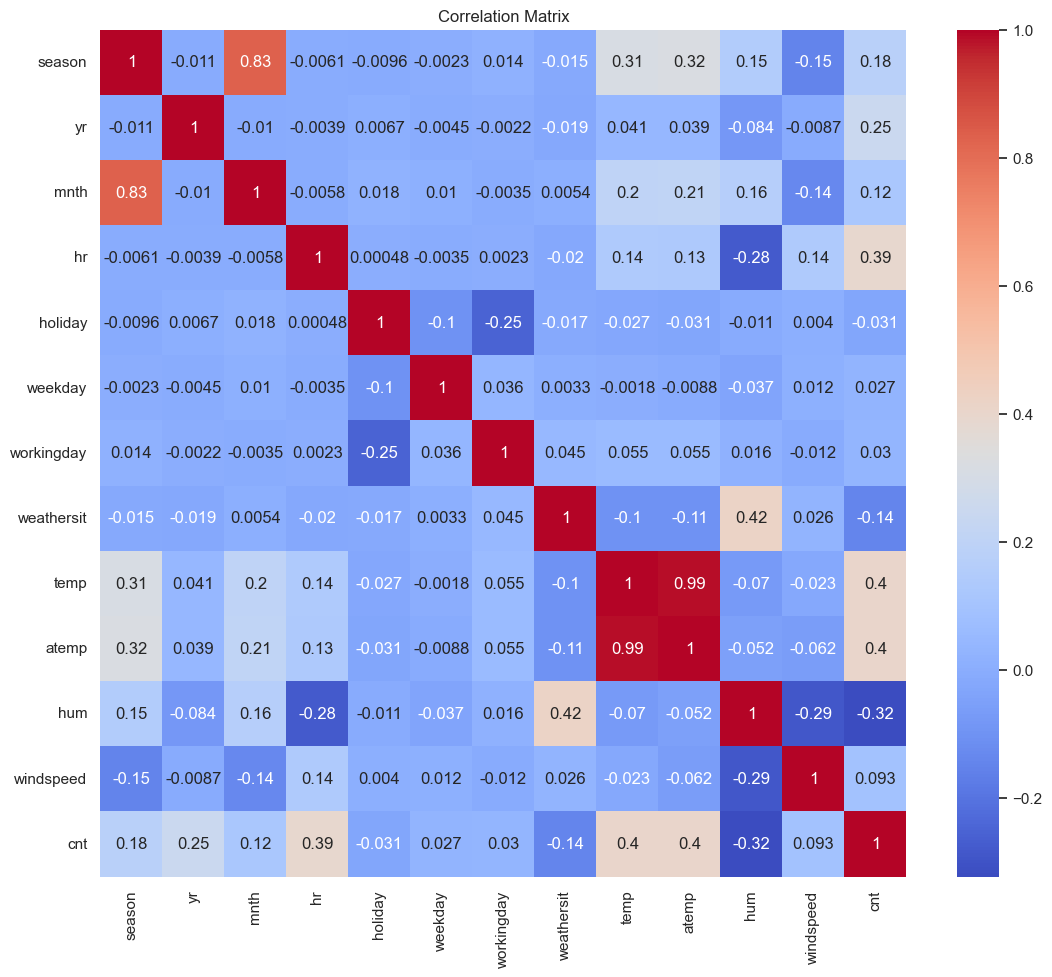

In [126]:
corr = theme_park_data.corr()

print("\nCorrelation Matrix:")
plt.figure(figsize=(13, 11))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

#### 2.1.3 Scatter plot of target column

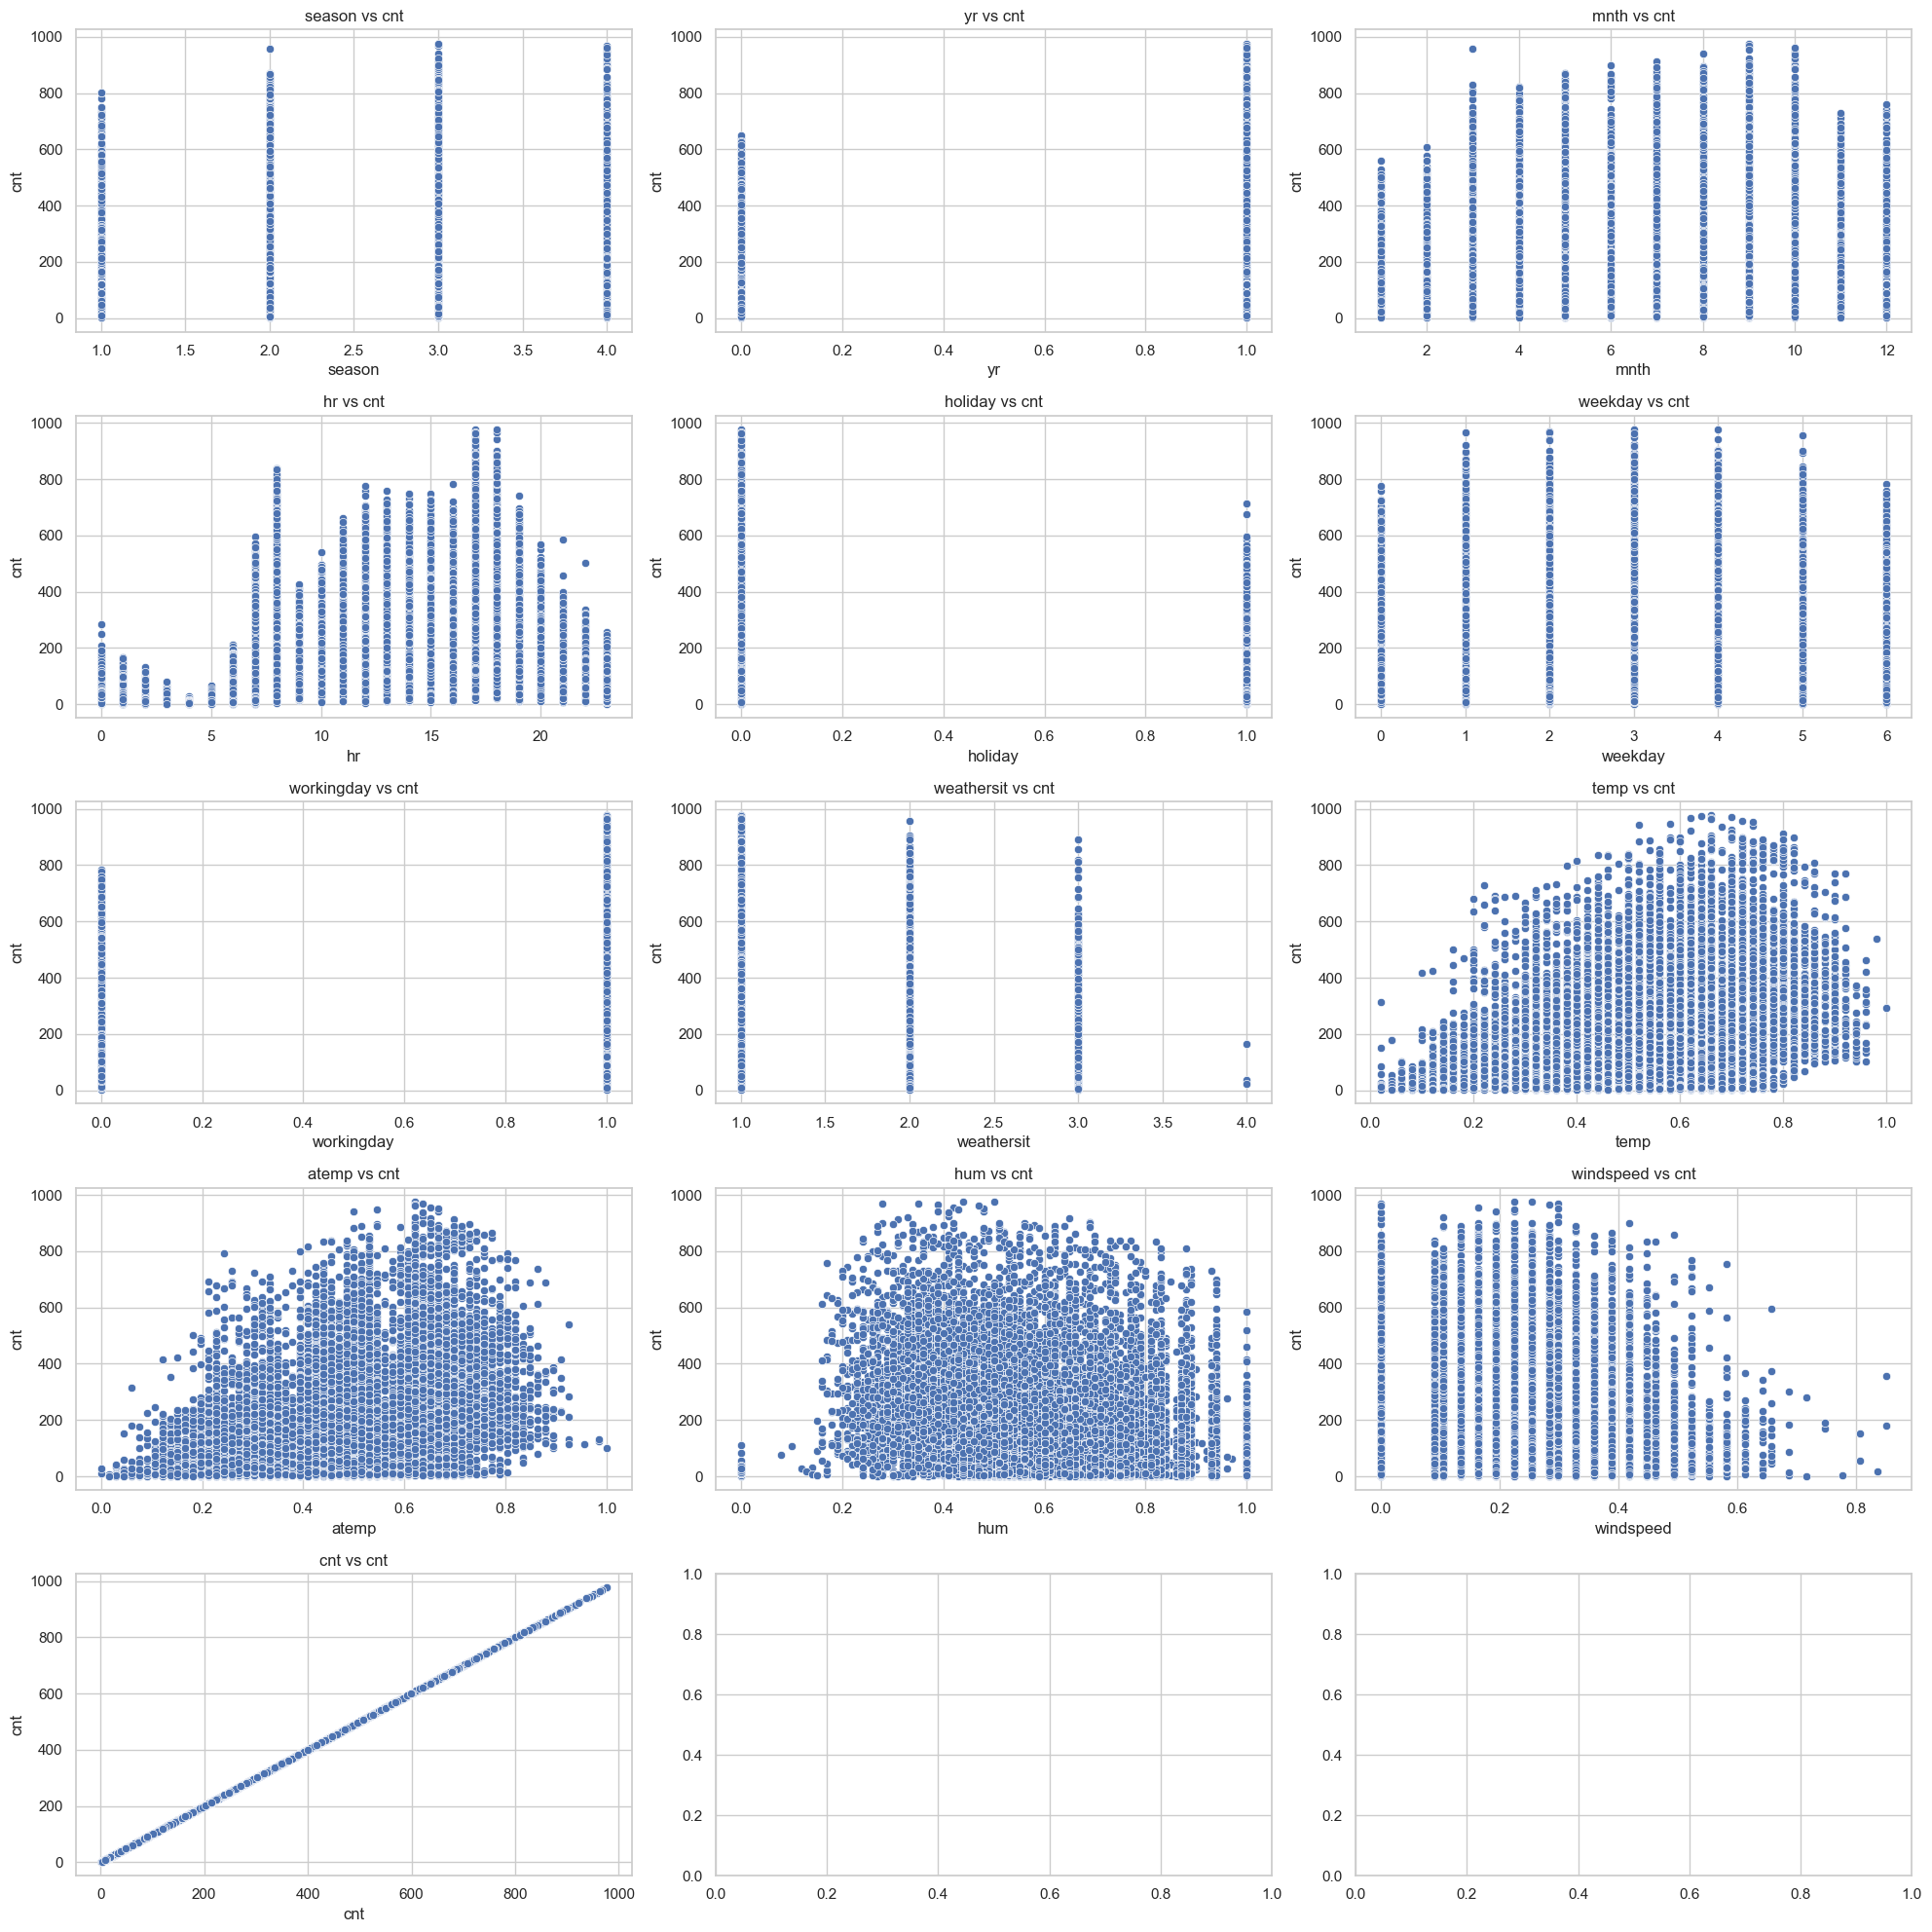

In [127]:
# Visualize the distribution of the cnt column on all data columns using scatter plots
fig, axes = plt.subplots(5, 3, figsize=(20, 20))
for i, column in enumerate(theme_park_data.columns):
    sns.scatterplot(data=theme_park_data, x=column, y="cnt", ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f"{column} vs cnt")
plt.tight_layout()
plt.show()

#### 2.1.4 Histogram
- We will check imbalance using histogram
- We have much more data on lower performing days rather than higher performing days.

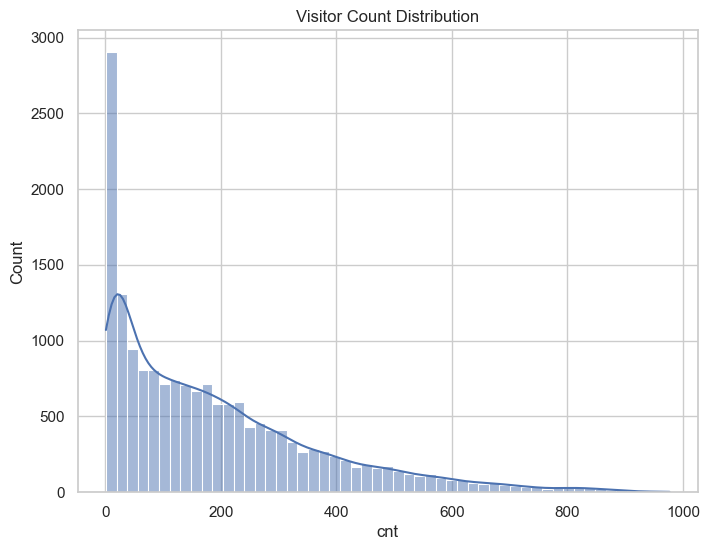

In [128]:
# checking imbalance using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(theme_park_data["cnt"], kde=True)
plt.title("Visitor Count Distribution")
plt.show()

### 2.2 Data Preprocessing

#### 2.2.1 Outlier Detection
- Using Z Score

Box Plots:


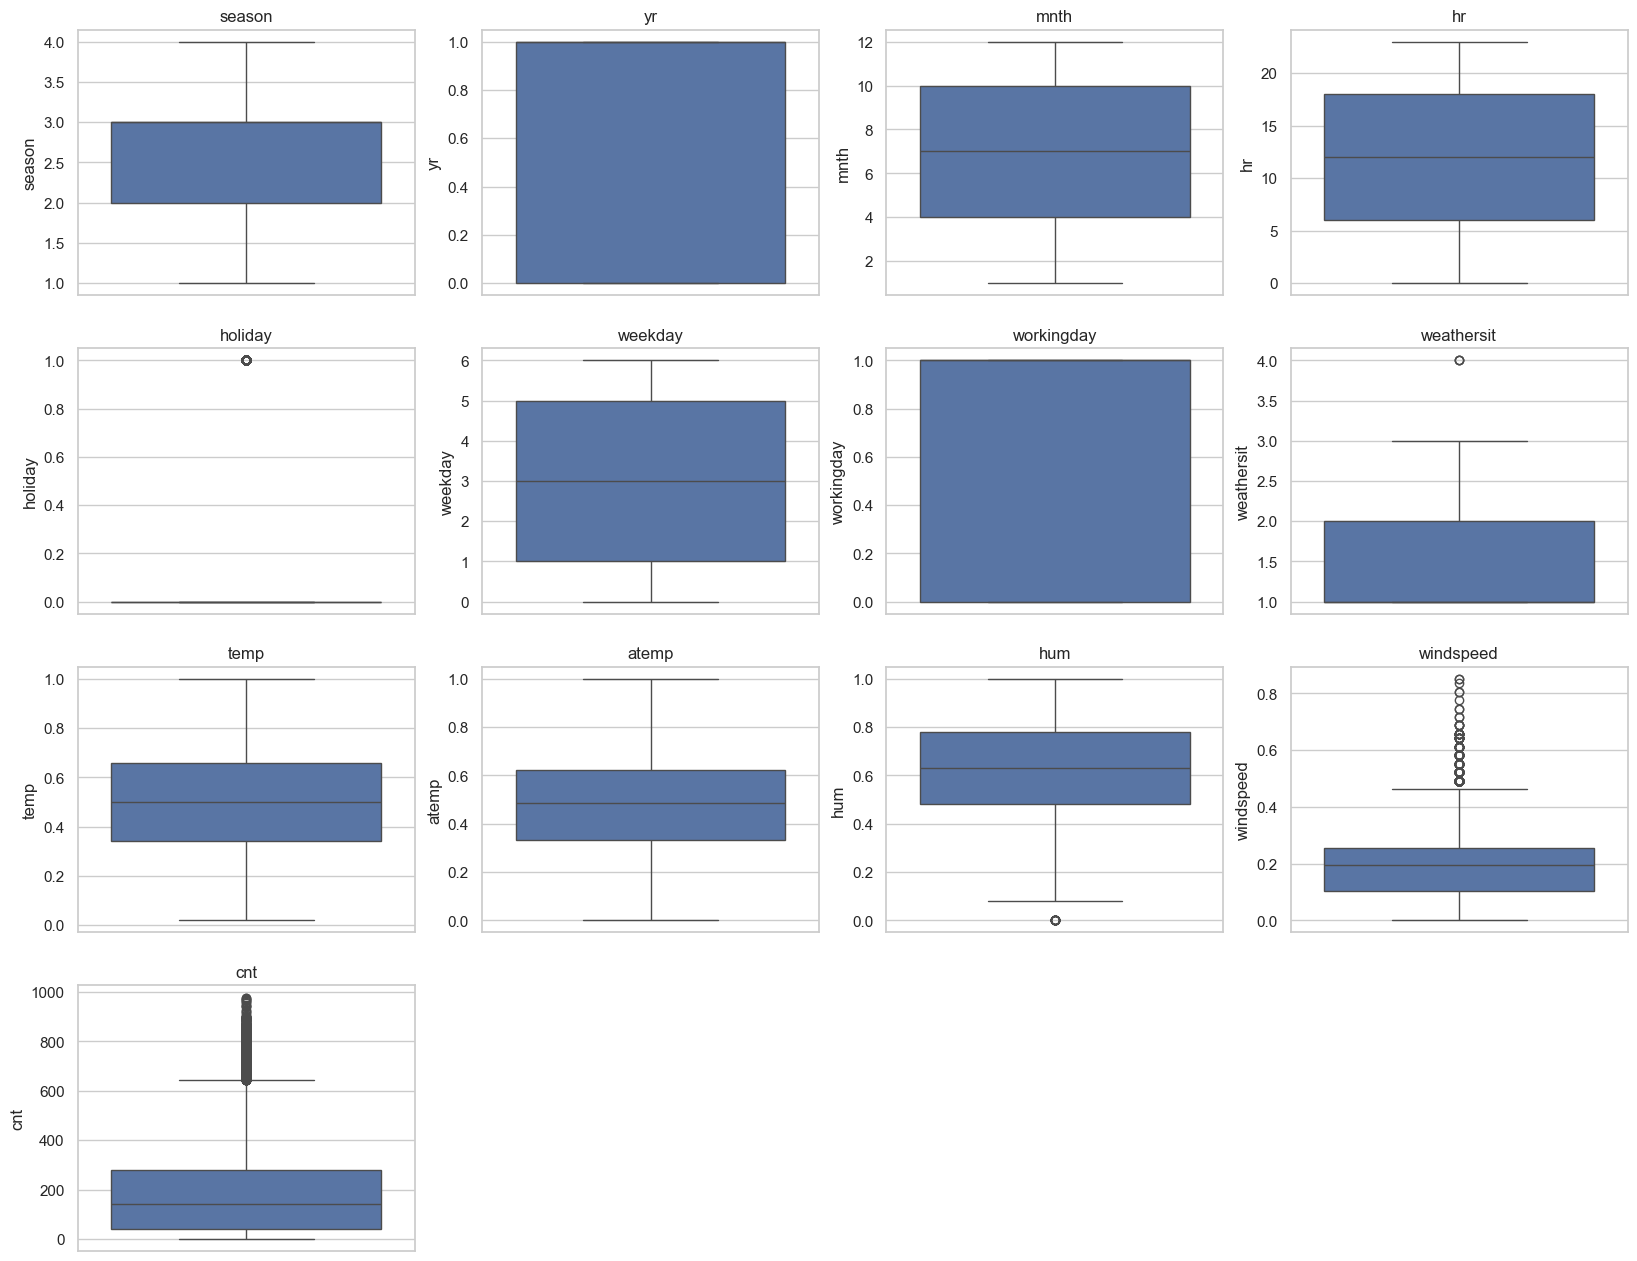

In [129]:
# detecting outliers using individual box plots
print("Box Plots:")
plt.figure(figsize=(20, 20))
for i, col in enumerate(theme_park_data.columns, start=1):
    plt.subplot(5, 4, i)
    sns.boxplot(y=theme_park_data[col])
    plt.title(col)
plt.show()

#### 2.2.2 Removing Outliers

Training Data Shape Before Removing Outliers: (17379, 13)
Training Data Shape After Removing Outliers: (16506, 13)
Box Plots After Removing Outliers:


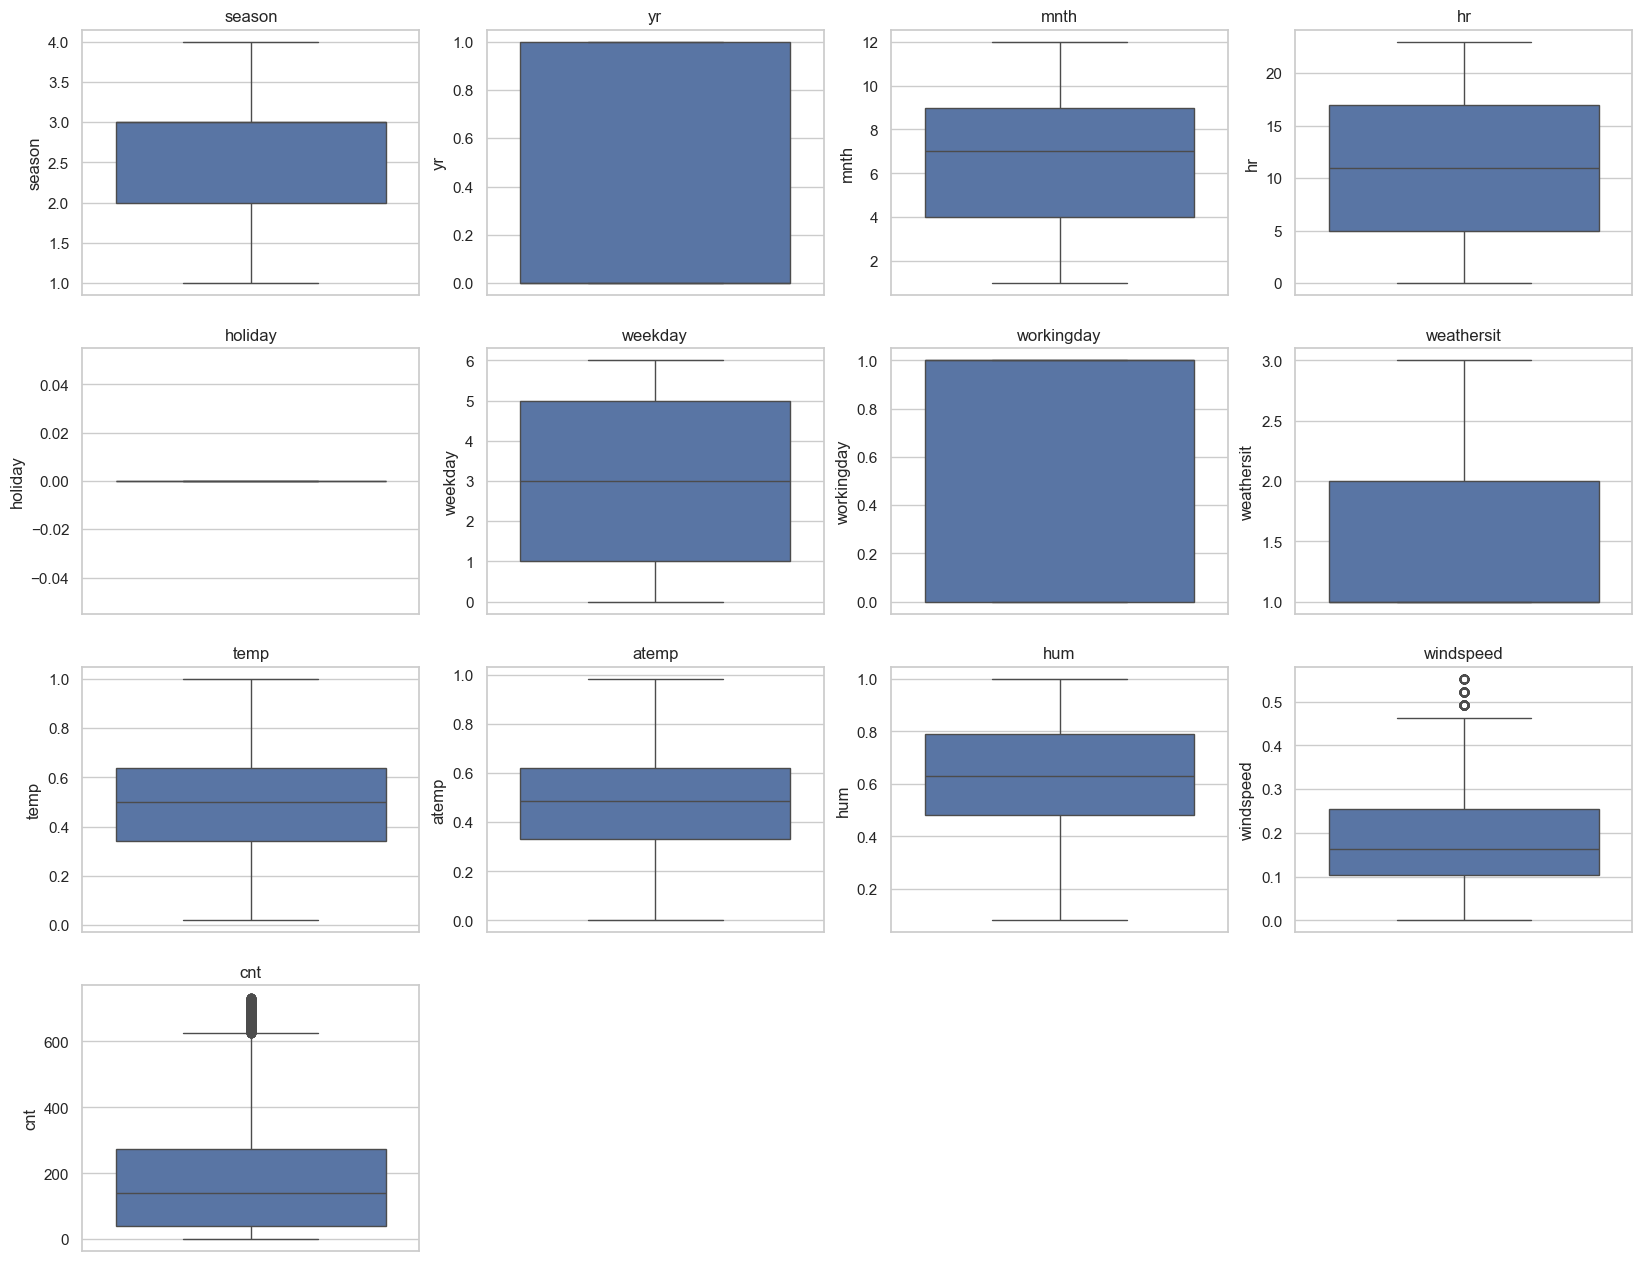

In [130]:
z_scores = np.abs(stats.zscore(theme_park_data))
threshold = 3

print("Training Data Shape Before Removing Outliers:", theme_park_data.shape)

# Removing outliers
theme_park_data_no_outliers = theme_park_data[(z_scores < threshold).all(axis=1)]

# show the shape of the data after removing outliers
print("Training Data Shape After Removing Outliers:", theme_park_data_no_outliers.shape)

# Draw Box plot after removing outliers
theme_park_data_no_outliers_df = pd.DataFrame(theme_park_data_no_outliers, columns=theme_park_data.columns)

print("Box Plots After Removing Outliers:")
plt.figure(figsize=(20, 20))
for i, col in enumerate(theme_park_data_no_outliers_df.columns, start=1):
    plt.subplot(5, 4, i)
    sns.boxplot(y=theme_park_data_no_outliers_df[col])
    plt.title(col)
plt.show()

- After removing our outliers, we lost about `873` rows in our train dataset but our outliers have been reduced.

#### 2.2.3 Processing Catagorical and Numerical Columns

##### Catagorical

In [131]:
catagorical_columns = [
    "season",
    "yr",
    "mnth",
    "holiday",
    "weekday",
    "workingday",
    "hr",
    "weathersit",
]

# Convert the categorical columns to one-hot encoding
theme_park_data = pd.get_dummies(theme_park_data, columns=catagorical_columns)

#### 2.2.4 Feature Selection

- from feature selection using correlation matrix we can drop `atemp` as it is highly correlated to `temp`    

In [132]:
theme_park_data.drop("atemp", axis=1, inplace=True)

#### 2.2.5 Split into train and test set

In [133]:
# Splitting the dataset
X = theme_park_data.drop("cnt", axis=1)
y = theme_park_data["cnt"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### 2.3 SVM Regression - Linear Kernel

#### 2.3.1 Fitting data to model

In [31]:
linear_regression_svm = SVR(kernel='linear', C=0.03)
linear_regression_svm.fit(X_train, y_train)
y_pred_linear_regression = linear_regression_svm.predict(X_test)

#### 2.3.2 Evaluating Model

In [32]:
accuracy_linear_regression = linear_regression_svm.score(X_test, y_test)
print(f"Linear Regression Accuracy: {accuracy_linear_regression:.2f}")

Linear Regression Accuracy: 0.17


#### 2.3.3 Using RandomizedSearchCV to optimize

In [134]:
# Define the parameter grid with distributions (if applicable for random sampling)
param_distributions = {
    "C": np.logspace(
        -2, 0, 5
    ),  # Generates [0.01, 0.03, 0.1, 0.3, 1] using logarithmic scale
    "epsilon": [0, 0.1, 0.3, 1, 3],
}

# RandomizedSearchCV with the desired number of iterations
random_search = RandomizedSearchCV(
    SVR(kernel="linear"),
    param_distributions,
    n_iter=10,  # Number of parameter settings sampled
    random_state=42,  # For reproducibility
    scoring="r2",  # Optional, specify the scoring metric if needed
)

# Fit to the training data
random_search.fit(X_train, y_train)

# Retrieve and print the best parameters and results
print("\nBest Parameters for Linear Regression using RandomizedSearchCV:")
print(random_search.best_params_)
best_linear_regression_svm = random_search.best_estimator_
best_linear_regression_svm.fit(X_train, y_train)
y_pred_best_linear_regression = best_linear_regression_svm.predict(X_test)

accuracy_best_linear_regression = best_linear_regression_svm.score(X_test, y_test)
print(
    f"Best Linear Regression Accuracy using RandomizedSearchCV: {accuracy_best_linear_regression:.2f}"
)

Best Linear Regression Accuracy using RandomizedSearchCV: 0.63



RandomizedSearchCV Results:


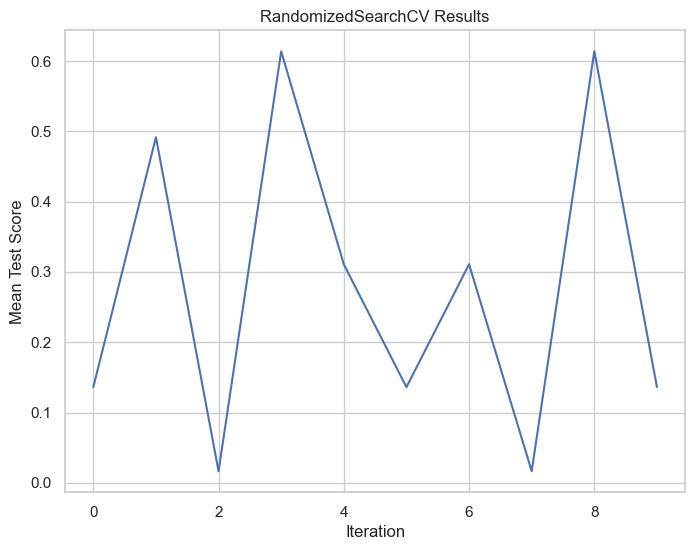

In [53]:
results = pd.DataFrame(random_search.cv_results_)
print("\nRandomizedSearchCV Results:")
# plot the results of mean_test_score
plt.figure(figsize=(8, 6))
plt.plot(results["mean_test_score"])
plt.xlabel("Iteration")
plt.ylabel("Mean Test Score")
plt.title("RandomizedSearchCV Results")
plt.show()

#### 2.3.4 K-fold cross validation
- The results of K-fold cross validation indicate that there is little to no overfitting in model.

In [34]:
# K-fold cross-validation
scores = cross_val_score(best_linear_regression_svm, X_train, y_train, cv=5)
print("\nCross Validation Scores:")
print(scores)


Cross Validation Scores:
[0.61866441 0.6110695  0.61822608 0.60890451 0.6120276 ]


### 2.4 SVM Regression - Non-Linear Kernel (RBF)

#### 2.4.1 Fitting Data to Model

In [35]:
# Non-Linear Regression (RBF Kernel)
rbf_regression_svm = SVR(kernel="rbf", C=1, epsilon=0)
rbf_regression_svm.fit(X_train, y_train)
y_pred_rbf_regression = rbf_regression_svm.predict(X_test)

#### 2.4.2 Evaluating the Model

In [36]:
# Evaluating the RBF Regression SVM Model
accuracy_rbf_regression = rbf_regression_svm.score(X_test, y_test)
print(f"RBF Regression Accuracy: {accuracy_rbf_regression:.2f}")

RBF Regression Accuracy: 0.34


#### 2.4.3 Using GridSearchCV to optimize

In [135]:
# Define the parameter grid with distributions (if applicable for random sampling)
param_distributions = {
    "C": [0.1, 1, 10, 100],
    "gamma": [1, 0.1, 0.01, 0.001],
    "epsilon": [0.1, 0.2, 0.5, 0.3],
    "kernel": ["rbf"],
}


# RandomizedSearchCV with the desired number of iterations
random_search = RandomizedSearchCV(
    SVR(kernel="rbf"),
    param_distributions,
    n_iter=10,  # Number of parameter settings sampled
    random_state=42,  # For reproducibility
    scoring="r2",  # Optional, specify the scoring metric if needed
)

# Fit to the training data
random_search.fit(X_train, y_train)

# Retrieve and print the best parameters and results
print("\nBest Parameters for RBF Regression using RandomizedSearchCV:")
print(random_search.best_params_)
best_rbf_regression_svm = random_search.best_estimator_
best_rbf_regression_svm.fit(X_train, y_train)
y_pred_best_rbf_regression = best_rbf_regression_svm.predict(X_test)

accuracy_best_rbf_regression = best_rbf_regression_svm.score(X_test, y_test)
print(
    f"Best RBF Regression Accuracy using RandomizedSearchCV: {accuracy_best_rbf_regression:.2f}"
)

Best RBF Regression Accuracy using RandomizedSearchCV: 0.92



RandomizedSearchCV Results:


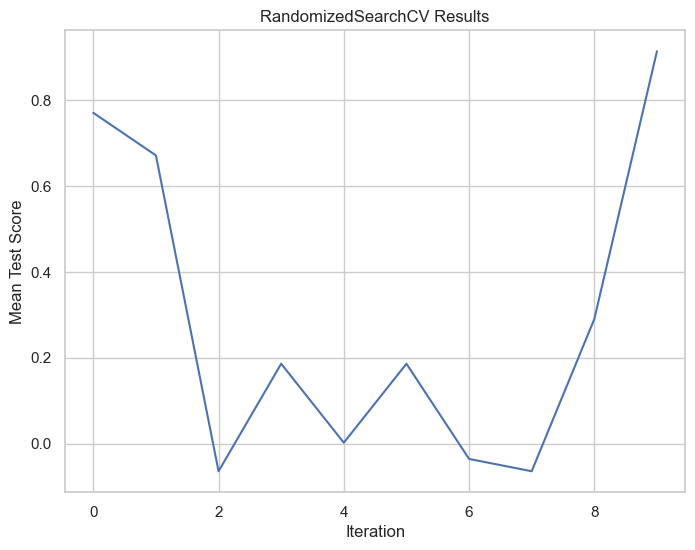

In [51]:
results = pd.DataFrame(random_search.cv_results_)
print("\nRandomizedSearchCV Results:")
# plot the results of mean_test_score
plt.figure(figsize=(8, 6))
plt.plot(results["mean_test_score"])
plt.xlabel("Iteration")
plt.ylabel("Mean Test Score")
plt.title("RandomizedSearchCV Results")
plt.show()

#### 2.4.4 K-fold cross validation
- The results of K-fold cross validation indicate that there is little to no overfitting in model.

In [38]:
# K-fold cross-validation
scores_rbf = cross_val_score(best_rbf_regression_svm, X_train, y_train, cv=5)
print("\nCross Validation Scores for RBF Regression:")
print(scores_rbf)


Cross Validation Scores for RBF Regression:
[0.91455346 0.90676799 0.91664604 0.91929984 0.91338218]


### 2.5 Model Evaluation and Comparison

#### 2.5.1 Comparison Plot

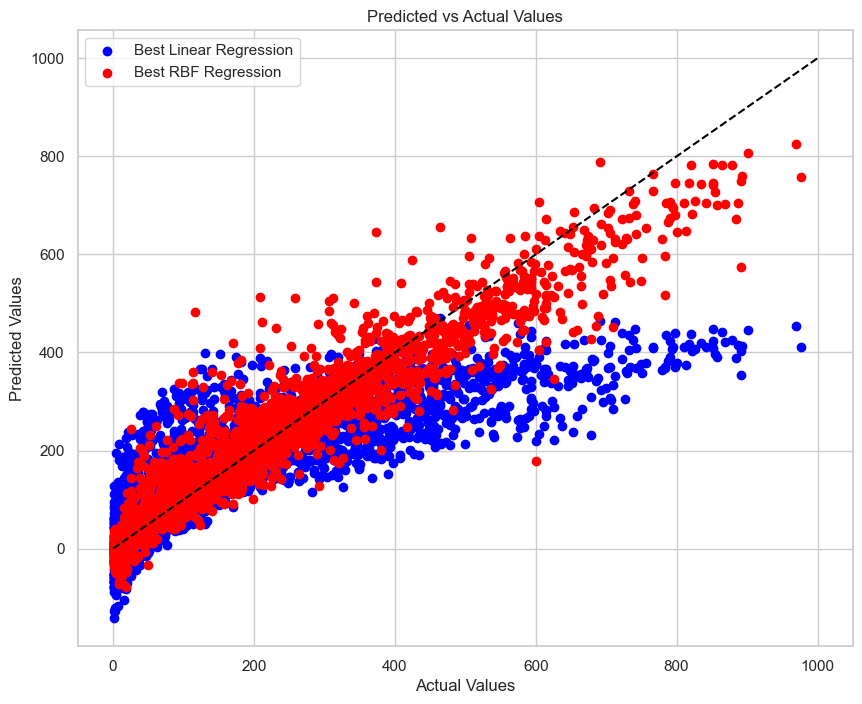

In [136]:
# plot the predicted vs actual values of the best linear regression model and rbf regression model
plt.figure(figsize=(10, 8))
plt.scatter(
    y_test, y_pred_best_linear_regression, label="Best Linear Regression", color="blue"
)
plt.scatter(
    y_test, y_pred_best_rbf_regression, label="Best RBF Regression", color="red"
)
plt.plot([0, 1000], [0, 1000], "--", color="black")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.legend()
plt.show()

#### 2.5.2 Mean Absolute Error (MAE)

In [137]:
# Mean Absolute Error (MAE)
mae_linear_regression = mean_absolute_error(y_test, y_pred_linear_regression)
mae_best_linear_regression = mean_absolute_error(y_test, y_pred_best_linear_regression)
mae_rbf_regression = mean_absolute_error(y_test, y_pred_rbf_regression)
mae_best_rbf_regression = mean_absolute_error(y_test, y_pred_best_rbf_regression)

print("\nMean Absolute Error:")
print(f"Linear Regression MAE: {mae_linear_regression:.2f}")

print(f"Best Linear Regression MAE: {mae_best_linear_regression:.2f}")
print(f"RBF Regression MAE: {mae_rbf_regression:.2f}")


Mean Absolute Error:
Linear Regression MAE: 113.98
Best Linear Regression MAE: 72.62
RBF Regression MAE: 96.23


#### 2.5.3 Mean Squared Error (MSE)

In [138]:
# Mean Squared Error (MSE)
mse_linear_regression = mean_squared_error(y_test, y_pred_linear_regression)
mse_best_linear_regression = mean_squared_error(y_test, y_pred_best_linear_regression)
mse_rbf_regression = mean_squared_error(y_test, y_pred_rbf_regression)
mse_best_rbf_regression = mean_squared_error(y_test, y_pred_best_rbf_regression)

print("\nMean Squared Error:")
print(f"Linear Regression MSE: {mse_linear_regression:.2f}")

print(f"Best Linear Regression MSE: {mse_best_linear_regression:.2f}")
print(f"RBF Regression MSE: {mse_rbf_regression:.2f}")


Mean Squared Error:
Linear Regression MSE: 26378.31
Best Linear Regression MSE: 11824.51
RBF Regression MSE: 20801.36


#### 2.5.4 Root Mean Squared Error (RMSE)

In [139]:
#  Root Mean Squared Error (RMSE)
rmse_linear_regression = np.sqrt(mse_linear_regression)
rmse_best_linear_regression = np.sqrt(mse_best_linear_regression)
rmse_rbf_regression = np.sqrt(mse_rbf_regression)
rmse_best_rbf_regression = np.sqrt(mse_best_rbf_regression)

print("\nRoot Mean Squared Error:")
print(f"Linear Regression RMSE: {rmse_linear_regression:.2f}")

print(f"Best Linear Regression RMSE: {rmse_best_linear_regression:.2f}")
print(f"RBF Regression RMSE: {rmse_rbf_regression:.2f}")


Root Mean Squared Error:
Linear Regression RMSE: 162.41
Best Linear Regression RMSE: 108.74
RBF Regression RMSE: 144.23


#### 2.5.5 R-squared (R²)

In [140]:
# R-squared (R²)
r2_linear_regression = r2_score(y_test, y_pred_linear_regression)
r2_best_linear_regression = r2_score(y_test, y_pred_best_linear_regression)
r2_rbf_regression = r2_score(y_test, y_pred_rbf_regression)
r2_best_rbf_regression = r2_score(y_test, y_pred_best_rbf_regression)

print("\nR-squared (R²):")
print(f"Linear Regression R²: {r2_linear_regression:.2f}")

print(f"Best Linear Regression R²: {r2_best_linear_regression:.2f}")
print(f"RBF Regression R²: {r2_rbf_regression:.2f}")


R-squared (R²):
Linear Regression R²: 0.17
Best Linear Regression R²: 0.63
RBF Regression R²: 0.34


#### 2.5.6 Visualize Regression Line


Best Linear Regression:


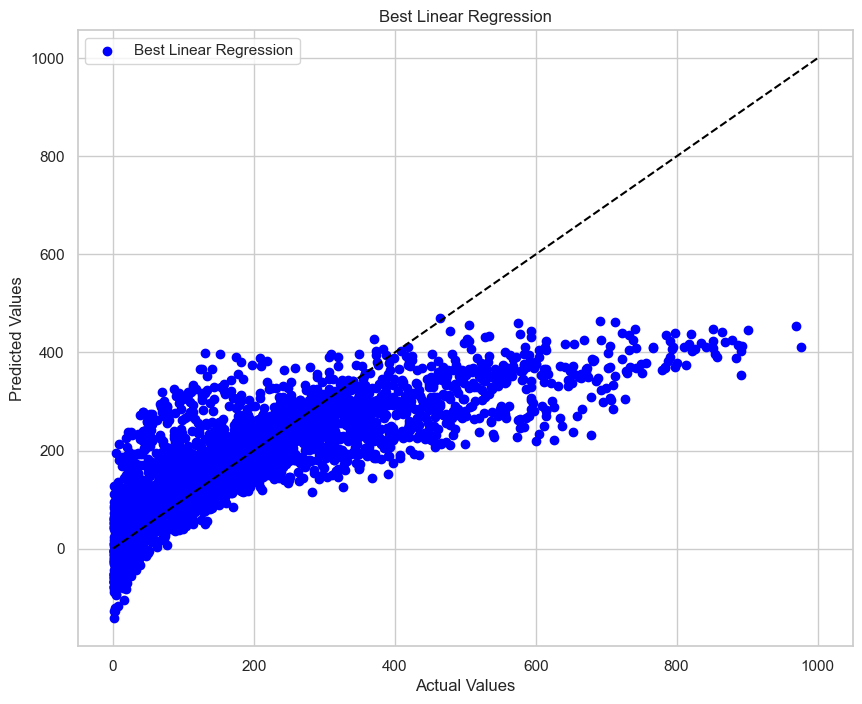


Best RBF Regression:


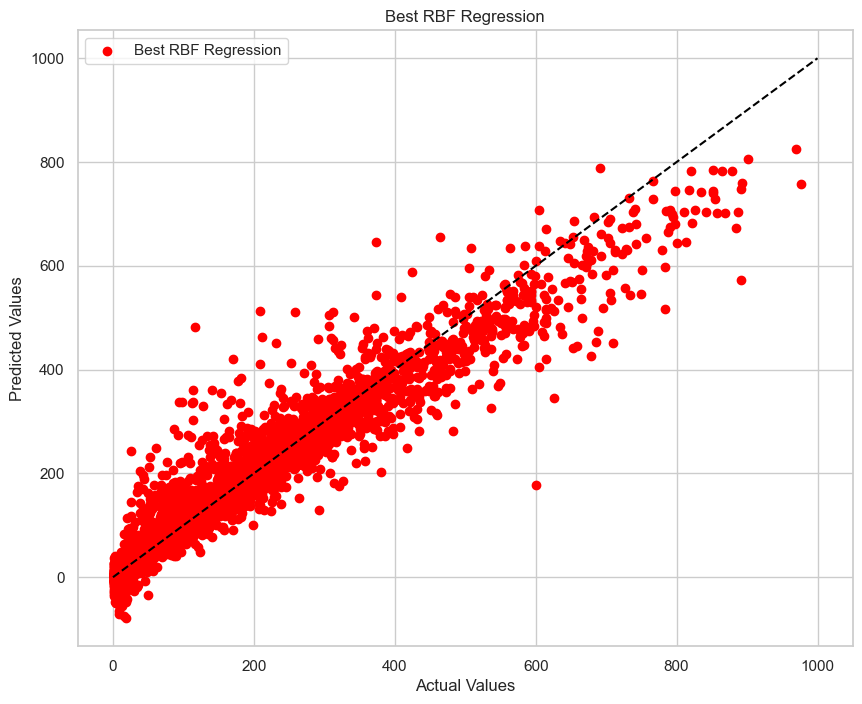

In [141]:
# visualizing the regression line
print("\nBest Linear Regression:")
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_best_linear_regression, label="Best Linear Regression", color="blue")
plt.plot([0, 1000], [0, 1000], "--", color="black")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Best Linear Regression")
plt.legend()
plt.show()

print("\nBest RBF Regression:")
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_best_rbf_regression, label="Best RBF Regression", color="red")
plt.plot([0, 1000], [0, 1000], "--", color="black")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Best RBF Regression")
plt.legend()
plt.show()


### 2.6 Saving Model and Modified Dataset

In [48]:
# save model and modified dataset
joblib.dump(best_linear_regression_svm, "best_theme_park_linear_regression_svm_model.pkl")
joblib.dump(best_rbf_regression_svm, "best_Theme_park_rbf_regression_svm_model.pkl")

X_train_df = pd.DataFrame(X_train, columns=theme_park_data.columns)
X_train_df["cnt"] = y_train

X_test_df = pd.DataFrame(X_test, columns=theme_park_data.columns)
X_test_df["cnt"] = y_test

combined_df = pd.concat([X_train_df, X_test_df])

X_train_df.to_csv("modified_theme_park_visitor_count_dataset_train.csv", index=False)
X_test_df.to_csv("modified_theme_park_visitor_count_dataset_test.csv", index=False)
combined_df.to_csv("updated_data_regression.csv", index=False)

## 3. Comparative Analysis

### 3.1 Classification: Linear vs Non-Linear SVM

Accuracy of the Best Linear SVM Model:  0.9181050312155711
Accuracy of the Best RBF SVM Model:  0.9012118986412045


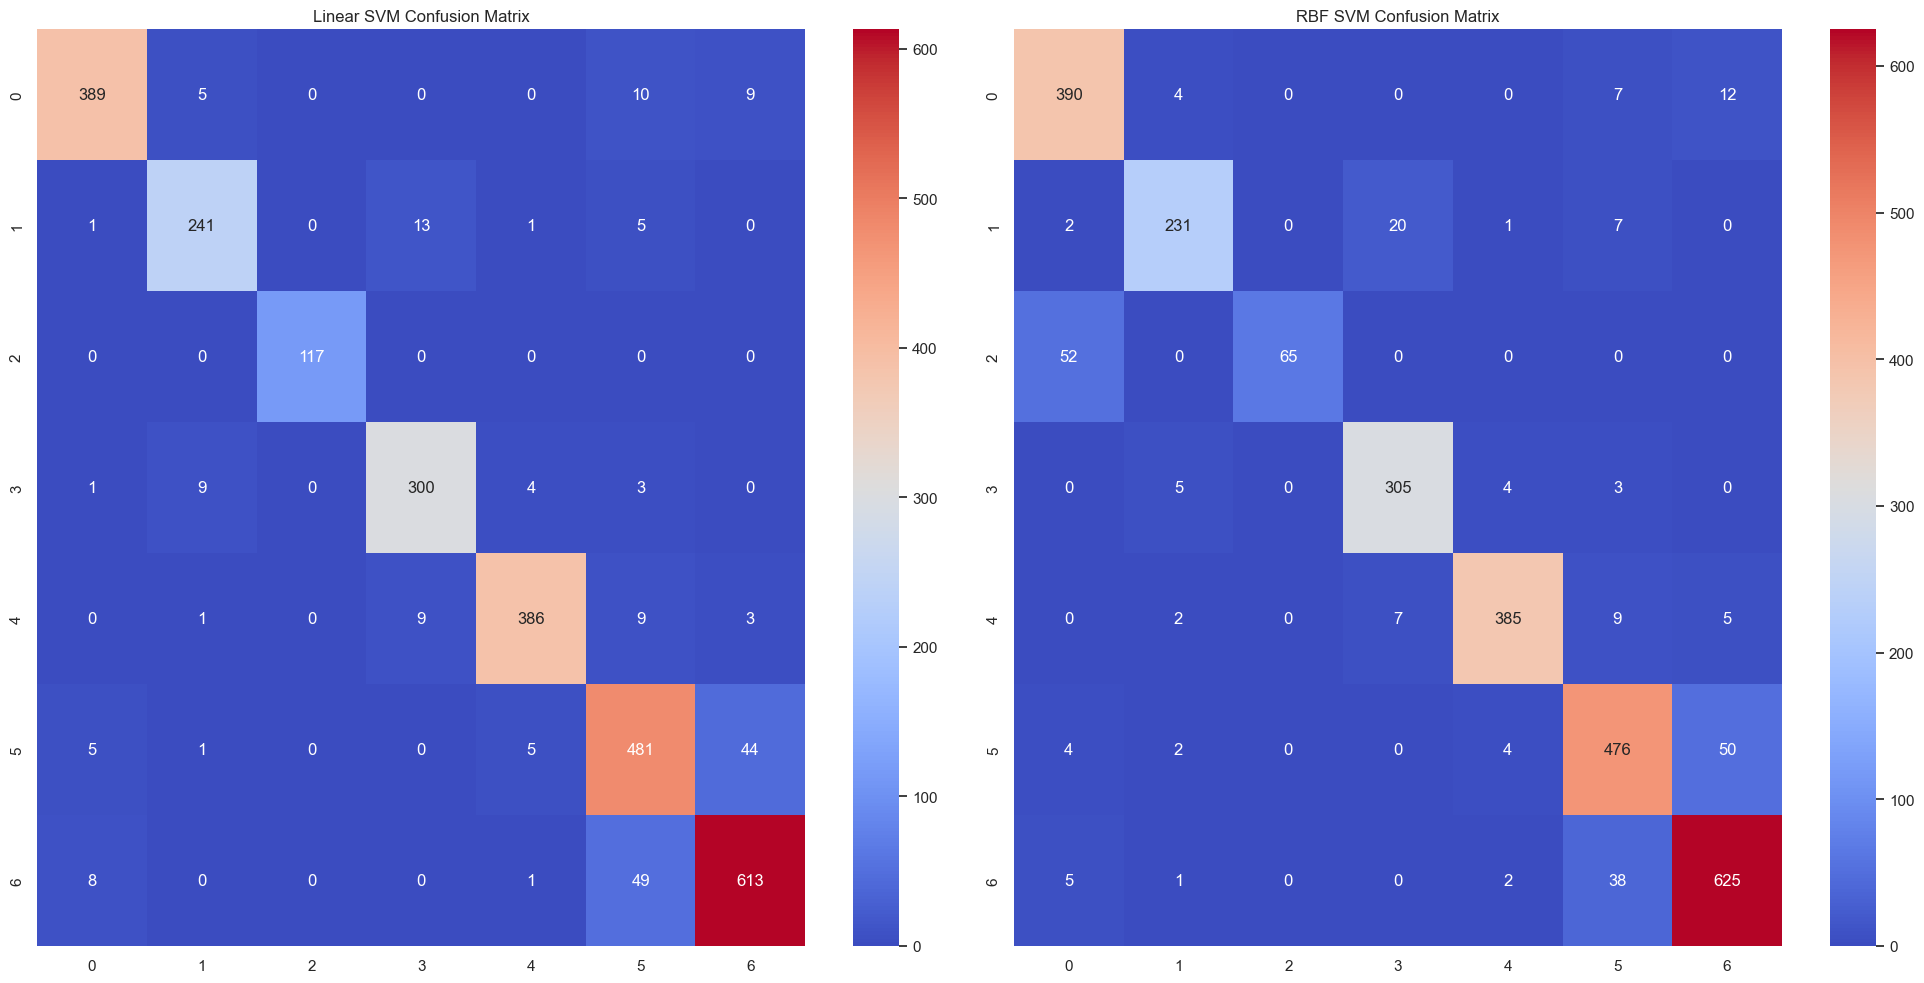

In [106]:
print("Accuracy of the Best Linear SVM Model: ", accuracy_linear)
print("Accuracy of the Best RBF SVM Model: ", accuracy_rbf)

# confusion matrix for all the svcs
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.heatmap(
    confusion_matrix(y_test, y_pred_best_linear),
    annot=True,
    fmt="d",
    cmap="coolwarm",
    ax=axes[0],
)
axes[0].set_title("Linear SVM Confusion Matrix")

sns.heatmap(
    confusion_matrix(y_test, y_pred_best_rbf),
    annot=True,
    fmt="d",
    cmap="coolwarm",
    ax=axes[1],
)
axes[1].set_title("RBF SVM Confusion Matrix")

plt.tight_layout()
plt.show()


### 3.2 Regression: Linear vs Non-Linear SVM

- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Mean Absolute Error of the Best Linear Regression Model:  72.61574737589889
Mean Absolute Error of the Best RBF Regression Model:  31.129119204599096
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Mean Squared Error of the Best Linear Regression Model:  11824.511063840713
Mean Squared Error of the Best RBF Regression Model:  2548.461074634773
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Root Mean Squared Error of the Best Linear Regression Model:  108.74056770056295
Root Mean Squared Error of the Best RBF Regression Model:  50.48228476044614
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
R-squared of the Best Linear Regression Model:  0.6265795843230677
R-squared of the Best RBF Regression Model:  0.9195190914289276
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -


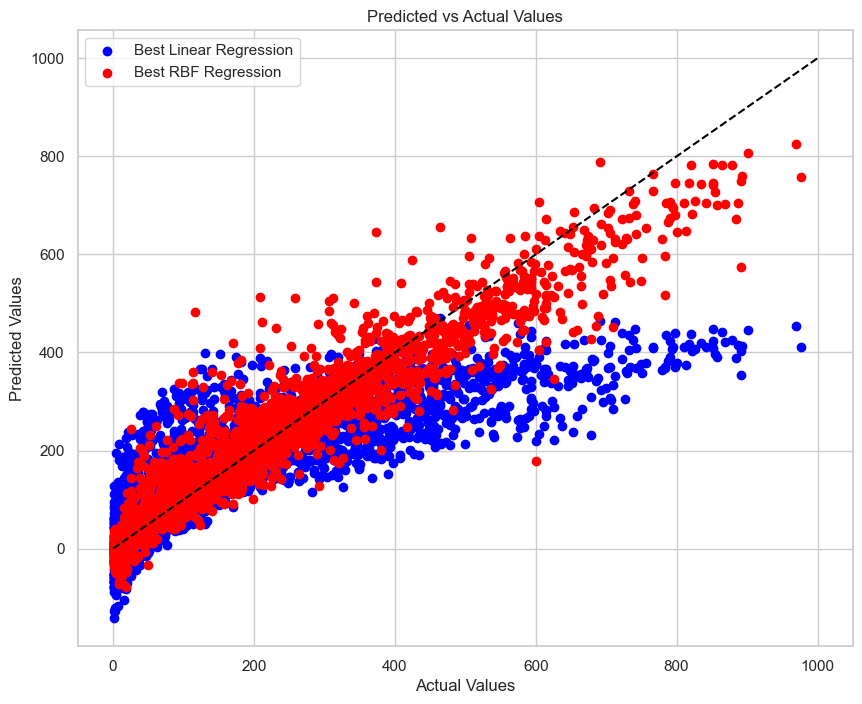

In [145]:
print("- -" * 20)
print("Mean Absolute Error of the Best Linear Regression Model: ", mae_best_linear_regression)
print("Mean Absolute Error of the Best RBF Regression Model: ", mae_best_rbf_regression)
print("- -" * 20)
print("Mean Squared Error of the Best Linear Regression Model: ", mse_best_linear_regression)
print("Mean Squared Error of the Best RBF Regression Model: ", mse_best_rbf_regression)
print("- -" * 20)
print("Root Mean Squared Error of the Best Linear Regression Model: ", rmse_best_linear_regression)
print("Root Mean Squared Error of the Best RBF Regression Model: ", rmse_best_rbf_regression)
print("- -" * 20)
print("R-squared of the Best Linear Regression Model: ", r2_best_linear_regression)
print("R-squared of the Best RBF Regression Model: ", r2_best_rbf_regression)
print("- -" * 20)

# Ensure the arrays have the same length
min_length = min(len(y_test), len(y_pred_best_linear_regression), len(y_pred_best_rbf_regression))
y_test = y_test[:min_length]
y_pred_best_linear_regression = y_pred_best_linear_regression[:min_length]
y_pred_best_rbf_regression = y_pred_best_rbf_regression[:min_length]

# plot the predicted vs actual values of the best linear regression model and rbf regression model
plt.figure(figsize=(10, 8))
plt.scatter(
    y_test, y_pred_best_linear_regression, label="Best Linear Regression", color="blue"
)
plt.scatter(
    y_test, y_pred_best_rbf_regression, label="Best RBF Regression", color="red"
)
plt.plot([0, 1000], [0, 1000], "--", color="black")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.legend()
plt.show()

### Analysis

#### **Rock Classification Dataset**
- **Accuracy of Best Linear SVM Model**: `91.81%`
- **Accuracy of Best RBF SVM Model**: `90.12%`

##### **Discussion**
- The **Linear SVM model** outperformed the **RBF SVM model**, achieving a slightly higher accuracy.
- This suggests that the decision boundary for this classification task is likely well-suited to a linear kernel, indicating that the dataset may be linearly separable or nearly so.
- The small difference in accuracy implies that the RBF kernel could still capture the underlying patterns, but the linear kernel was more effective.

---

#### **Theme Park Regression Dataset**
- R^2:
  - Linear: `0.63`
  - RBF: `0.92`

##### **Discussion**
- The **RBF SVM model** significantly outperformed the **Linear Regression SVM model** across all metrics.
- The RBF kernel's ability to model non-linear relationships proved essential for this dataset, as evidenced by its much lower error rates and higher `R-squared` value.
- The **Linear Regression SVM model** struggled to capture the non-linear relationships in the data, resulting in poor performance.


## 4. Conclusion

This assignment demonstrated the effectiveness of SVM models with linear and RBF kernels for both classification and regression tasks. The results highlighted the importance of selecting the right kernel based on the dataset's characteristics: linear kernels excelled for simpler, linearly separable data, while RBF kernels outperformed in capturing complex, non-linear relationships.

During the implementation, I faced challenges with memory issues, especially when working with large datasets and hyperparameter tuning. These issues caused occasional interruptions in the training process. I resolved this by periodically saving the best-performing model during the training process, ensuring that progress was preserved and I could resume without restarting from scratch. This approach not only mitigated memory constraints but also streamlined experimentation and improved efficiency.

Overall, this assignment deepened my understanding of SVM models, hyperparameter optimization, and practical techniques for handling resource limitations during model training.